In [10]:
import pandas as pd
import os

# === CONFIGURATION ===
# Folder paths
input_folder = r'D:\MSDS\Network Science\project\fhvhv_combined_data_sampled'
output_folder = r'D:\MSDS\Network Science\project\fhvhv_cleaned_sampled'
os.makedirs(output_folder, exist_ok=True)

# Years to process
years = [2019, 2020, 2021, 2022, 2023]

# Files per year (update these filenames to exactly match your files)
files_per_year = {
    2019: [
        'fhvhv_tripdata_2019-02_to_2019-05_sampled.csv',
        'fhvhv_tripdata_2019-06_to_2019-09_sampled.csv',
        'fhvhv_tripdata_2019-10_to_2020-01_sampled.csv'
    ],
    2020: [
        'fhvhv_tripdata_2020-02_to_2020-05_sampled.csv',
        'fhvhv_tripdata_2020-06_to_2020-09_sampled.csv',
        'fhvhv_tripdata_2020-10_to_2021-01_sampled.csv'
    ],
    2021: [
        'fhvhv_tripdata_2021-02_to_2021-05_sampled.csv',
        'fhvhv_tripdata_2021-06_to_2021-09_sampled.csv',
        'fhvhv_tripdata_2021-10_to_2022-01_sampled.csv'
    ],
    2022: [
        'fhvhv_tripdata_2022-02_to_2022-05_sampled.csv',
        'fhvhv_tripdata_2022-06_to_2022-09_sampled.csv',
        'fhvhv_tripdata_2022-10_to_2023-01_sampled.csv'
    ],
    2023: [
        'fhvhv_tripdata_2023-02_to_2023-05_sampled.csv',
        'fhvhv_tripdata_2023-06_to_2023-09_sampled.csv',
        'fhvhv_tripdata_2023-10_to_2024-01_sampled.csv'
    ],
}


# Sampling config
target_total_rows = 20000
cap_per_combo = 100  # Max rows per (PULocationID + DOLocationID) combo

# === PROCESS LOOP ===
for year in years:
    print(f"\n🔄 Processing {year}...")
    cleaned_dfs = []
    files = files_per_year.get(year, [])
    
    if not files:
        print(f"⚠️ No files listed for {year}, skipping...")
        continue

    for file_name in files:
        file_path = os.path.join(input_folder, file_name)
        
        try:
            print(f"➡️ Cleaning file: {file_name}")
            df = pd.read_csv(file_path)
            
            # Drop duplicates
            df = df.drop_duplicates()
            
            # Drop rows with PU/DO = 0 (assumed invalid)
            df = df[(df['PULocationID'] != 0) & (df['DOLocationID'] != 0)]
            
            # Cap PU+DO combos to prevent heavy repetition
            df_capped = (
                df.groupby(['PULocationID', 'DOLocationID'])
                .head(cap_per_combo)
                .reset_index(drop=True)
            )
            
            # Sample ~1/3 of 20k from each file
            sample_size = min(len(df_capped), target_total_rows // len(files))
            df_sampled = df_capped.sample(sample_size, random_state=42)
            
            print(f"✅ {sample_size} rows kept from {file_name}.")
            cleaned_dfs.append(df_sampled)
        
        except Exception as e:
            print(f"❗ Error processing {file_name}: {e}")
    
    if cleaned_dfs:
        # Combine all sampled chunks for the year
        final_df = pd.concat(cleaned_dfs, ignore_index=True)
        
        # Final downsampling if slightly over 20k
        if len(final_df) > target_total_rows:
            final_df = final_df.sample(target_total_rows, random_state=42)
        
        # Save the final cleaned sample for the year
        output_file = f'fhvhv_tripdata_{year}_cleaned_sampled.csv'
        output_path = os.path.join(output_folder, output_file)
        final_df.to_csv(output_path, index=False)
        print(f"💾 Saved {len(final_df)} rows to {output_file}")
    else:
        print(f"⚠️ No valid data cleaned for {year}.")



🔄 Processing 2019...
➡️ Cleaning file: fhvhv_tripdata_2019-02_to_2019-05_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2019-02_to_2019-05_sampled.csv.
➡️ Cleaning file: fhvhv_tripdata_2019-06_to_2019-09_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2019-06_to_2019-09_sampled.csv.
➡️ Cleaning file: fhvhv_tripdata_2019-10_to_2020-01_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2019-10_to_2020-01_sampled.csv.
💾 Saved 19998 rows to fhvhv_tripdata_2019_cleaned_sampled.csv

🔄 Processing 2020...
➡️ Cleaning file: fhvhv_tripdata_2020-02_to_2020-05_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2020-02_to_2020-05_sampled.csv.
➡️ Cleaning file: fhvhv_tripdata_2020-06_to_2020-09_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2020-06_to_2020-09_sampled.csv.
➡️ Cleaning file: fhvhv_tripdata_2020-10_to_2021-01_sampled.csv
✅ 6666 rows kept from fhvhv_tripdata_2020-10_to_2021-01_sampled.csv.
💾 Saved 19998 rows to fhvhv_tripdata_2020_cleaned_sampled.csv

🔄 Processing 2021...
➡️ Cleaning 


📊 Visualizing 2019...


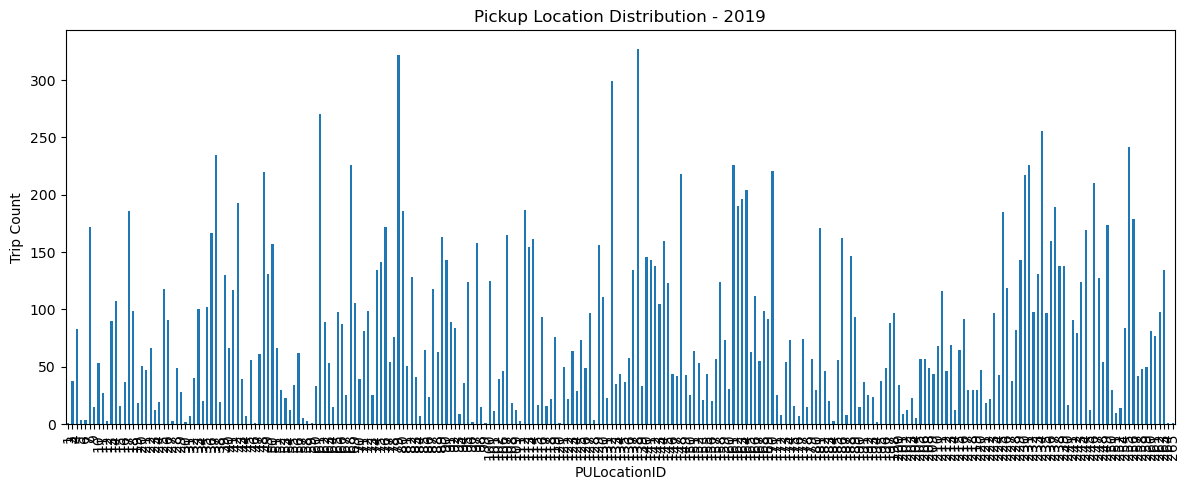

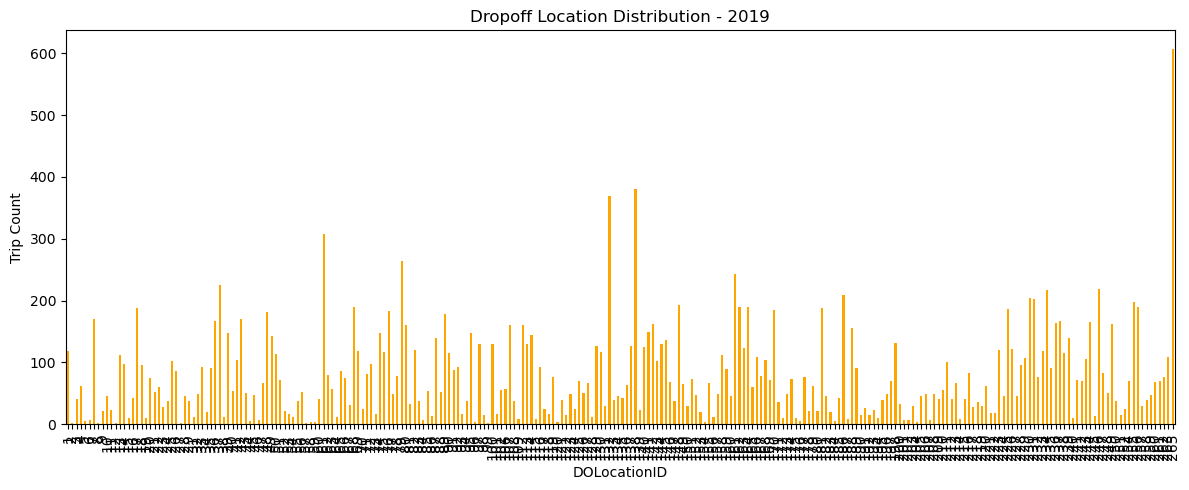

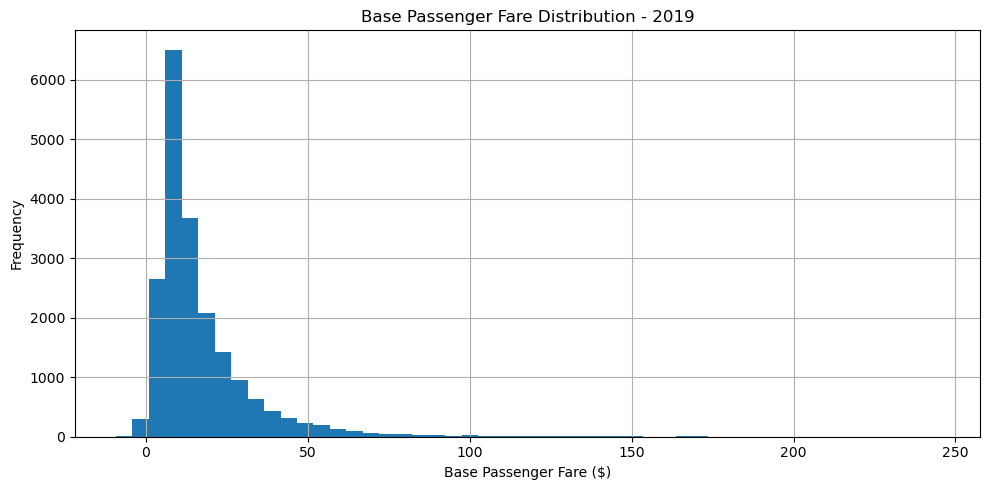


📊 Visualizing 2020...


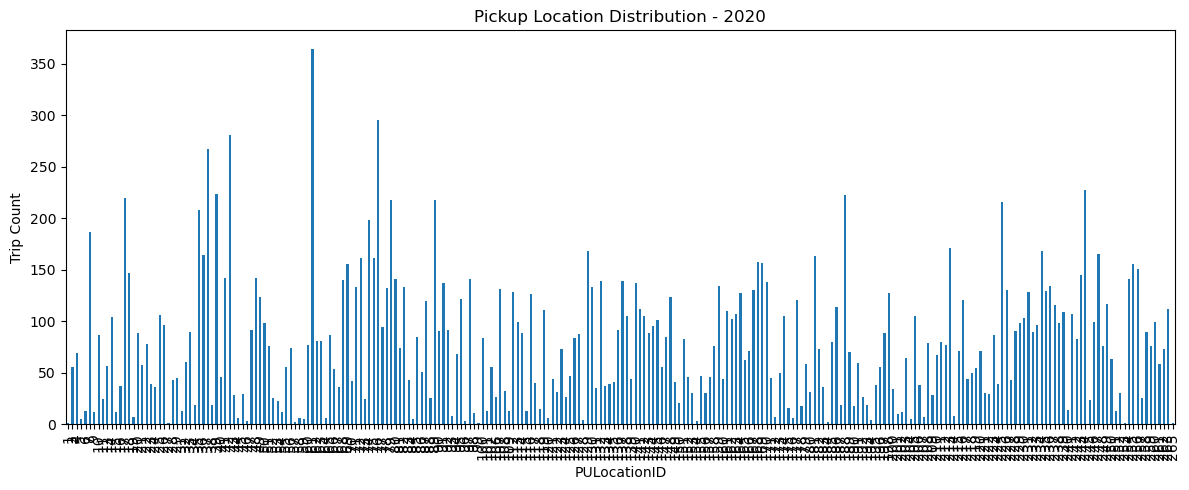

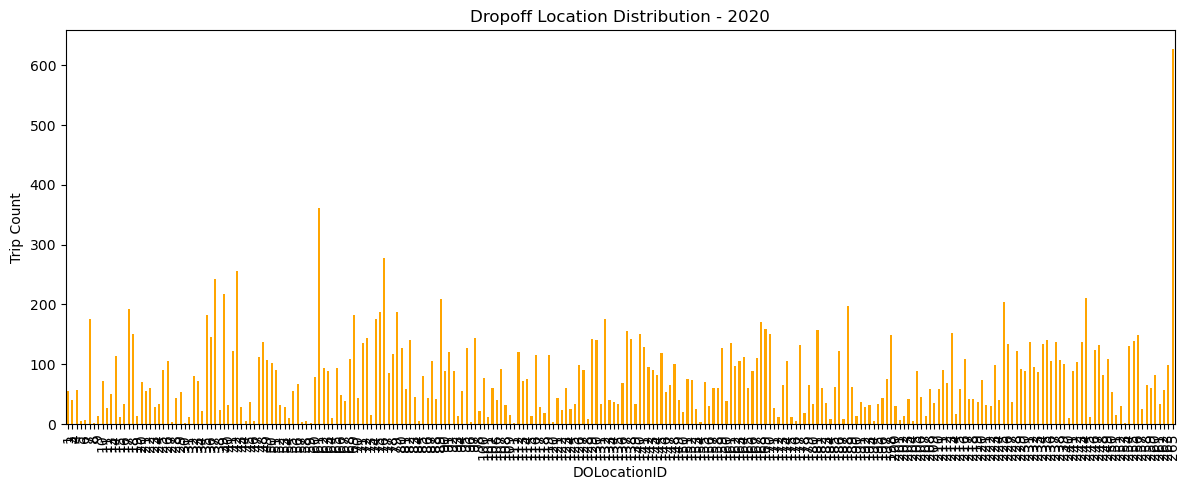

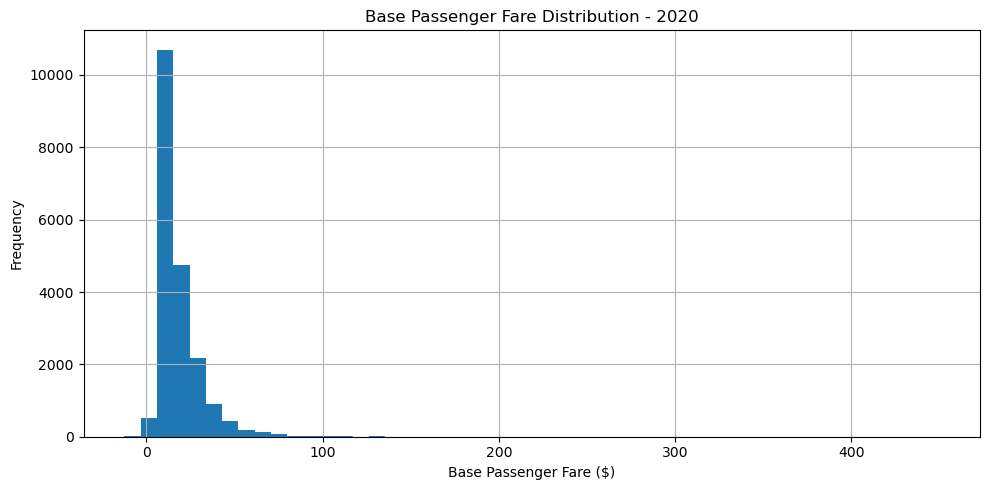


📊 Visualizing 2021...


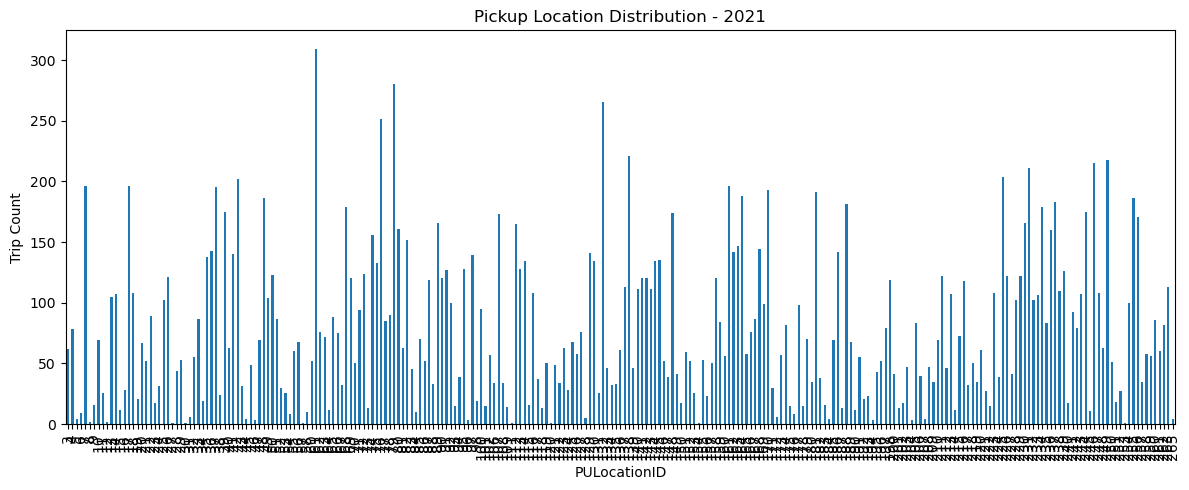

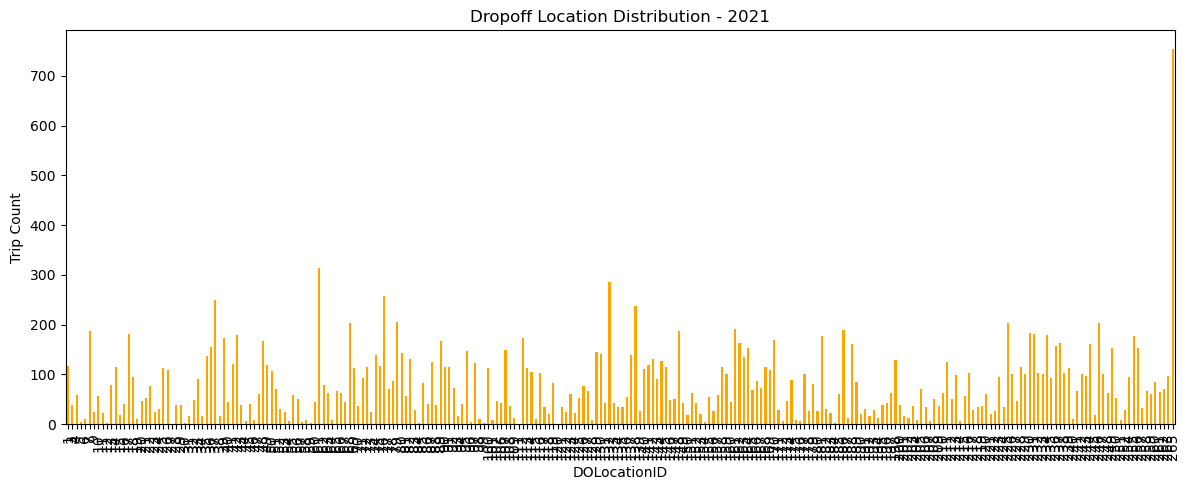

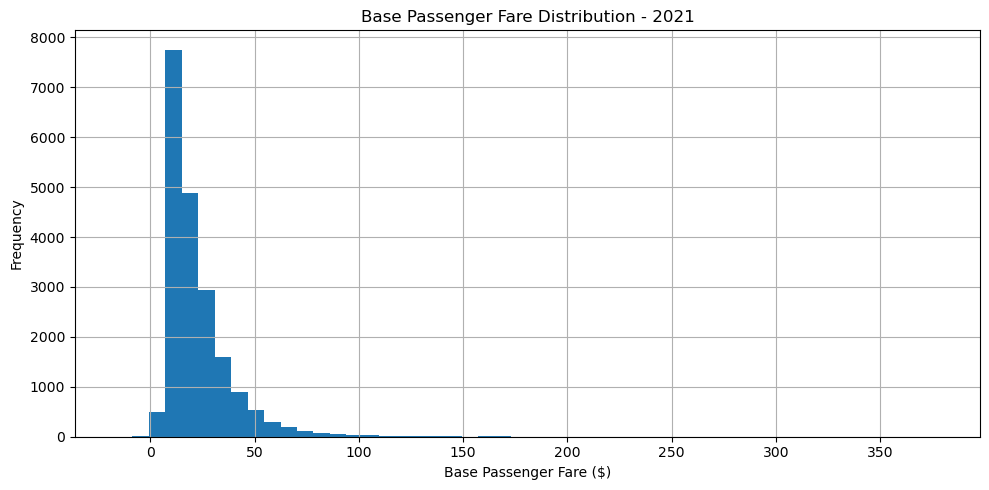


📊 Visualizing 2022...


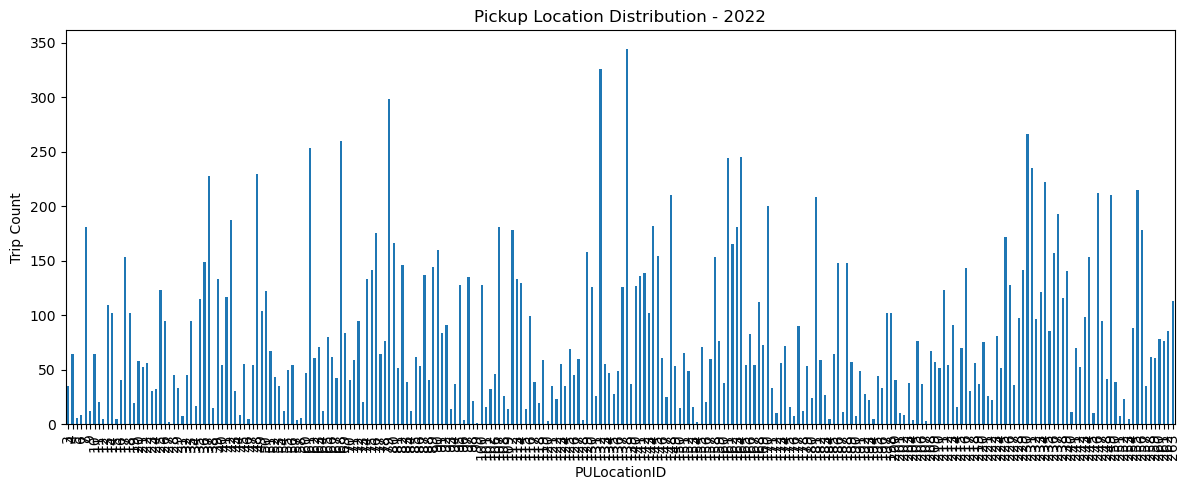

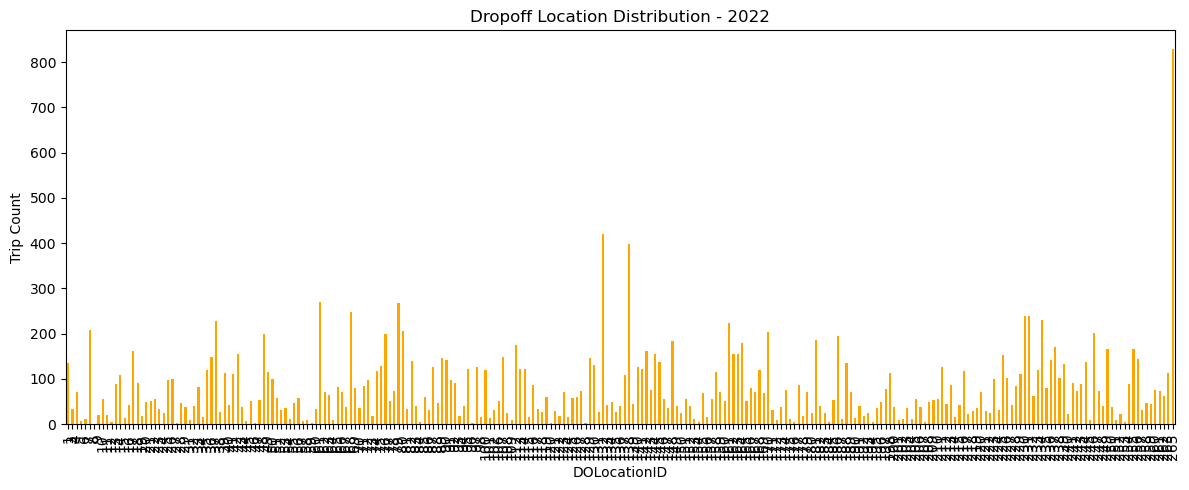

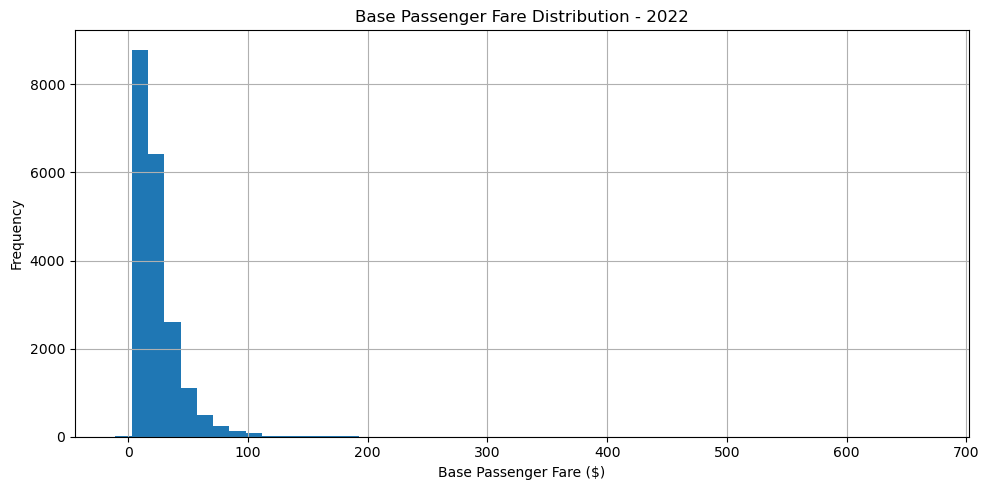


📊 Visualizing 2023...


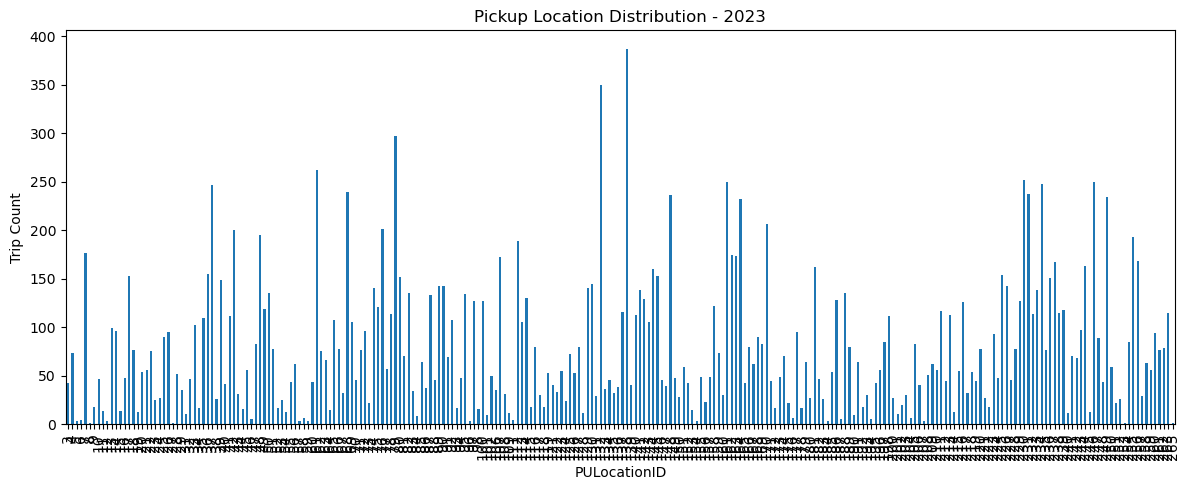

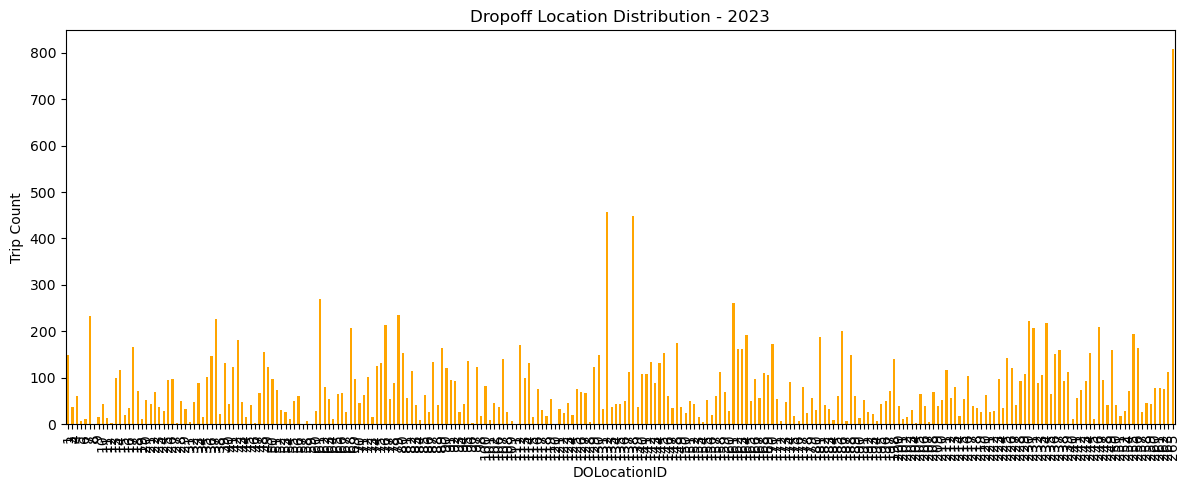

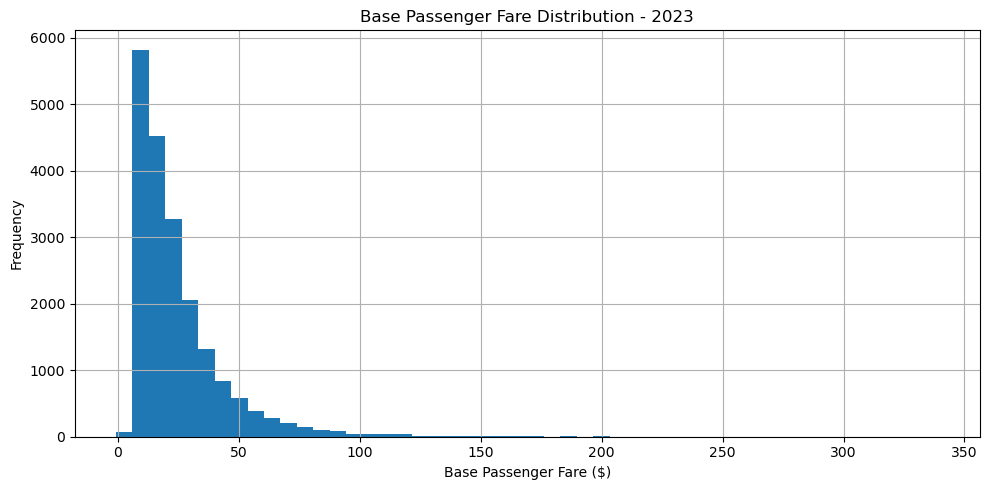

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIGURATION ===
folder = r'D:\MSDS\Network Science\project\fhvhv_cleaned_sampled'
years = [2019, 2020, 2021, 2022, 2023]

# Loop through each year's file
for year in years:
    print(f"\n📊 Visualizing {year}...")
    file_path = os.path.join(folder, f'fhvhv_tripdata_{year}_cleaned_sampled.csv')
    
    try:
        df = pd.read_csv(file_path)
        
        # 1️⃣ Pickup distribution
        plt.figure(figsize=(12, 5))
        df['PULocationID'].value_counts().sort_index().plot(kind='bar')
        plt.title(f'Pickup Location Distribution - {year}')
        plt.xlabel('PULocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        
        # 2️⃣ Dropoff distribution
        plt.figure(figsize=(12, 5))
        df['DOLocationID'].value_counts().sort_index().plot(kind='bar', color='orange')
        plt.title(f'Dropoff Location Distribution - {year}')
        plt.xlabel('DOLocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        
        # 3️⃣ Base Passenger Fare distribution (if available)
        # Some datasets may have 'base_passenger_fare' or similar; adjust column name if needed
        fare_cols = [col for col in df.columns if 'base_passenger_fare' in col.lower()]
        
        if fare_cols:
            fare_col = fare_cols[0]  # take the first match
            plt.figure(figsize=(10, 5))
            df[fare_col].dropna().hist(bins=50)
            plt.title(f'Base Passenger Fare Distribution - {year}')
            plt.xlabel('Base Passenger Fare ($)')
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ No 'base_passenger_fare' column found in {file_path}. Skipping fare plot.")

    except Exception as e:
        print(f"❗ Error processing {file_path}: {e}")


In [15]:
import pandas as pd
import os

# Set up paths
input_folder = r"D:\MSDS\Network Science\project\green_combined_data_sampled"
output_folder = r"D:\MSDS\Network Science\project\greentrips_cleaned_per_year"
os.makedirs(output_folder, exist_ok=True)

# Years you have
years = list(range(2014, 2024 + 1))  # 2014 to 2024

# Sampling target
target_rows = 20000

# Define expected columns
expected_columns = [
    'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
    'PULocationID', 'DOLocationID', 'trip_distance',
    'fare_amount', 'tip_amount', 'total_amount'
]

# Function to clean data
def clean_green_data(df):
    df = df.dropna(subset=['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount'])
    df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
    df = df.drop_duplicates()
    return df

# Loop over years
for year in years:
    print(f"\nProcessing year: {year}")
    year_files = []
    
    # Batch 1: 01_to_04
    batch1 = f'green_tripdata_{year}-01_to_{year}-04_sampled.csv'
    # Batch 2: 05_to_08
    batch2 = f'green_tripdata_{year}-05_to_{year}-08_sampled.csv'
    # Batch 3: 09_to_12 (corrected here)
    batch3 = f'green_tripdata_{year}-09_to_{year}-12_sampled.csv'
    
    for file_name in [batch1, batch2, batch3]:
        file_path = os.path.join(input_folder, file_name)
        if os.path.exists(file_path):
            year_files.append(file_path)
        else:
            print(f"  ⚠️ File not found: {file_name}")
    
    if not year_files:
        print(f"  ❗ No files found for {year}. Skipping.")
        continue

    # Combine all batches for the year
    combined_df = pd.DataFrame()
    for f in year_files:
        print(f"  Reading {os.path.basename(f)}")
        df = pd.read_csv(f)
        
        if not all(col in df.columns for col in expected_columns):
            print(f"    ⚠️ Columns mismatch in {os.path.basename(f)}. Skipping this file.")
            continue
        
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        print(f"    ✅ Loaded {len(df)} rows.")
    
    print(f"  Combined total rows before cleaning: {len(combined_df)}")
    
    # Clean
    cleaned_df = clean_green_data(combined_df)
    print(f"  Cleaned rows: {len(cleaned_df)}")
    
    # Sample down to 20k if needed
    if len(cleaned_df) > target_rows:
        cleaned_df = cleaned_df.sample(n=target_rows, random_state=42)
        print(f"  Sampled down to {target_rows} rows.")
    
    # Save
    output_path = os.path.join(output_folder, f"green_tripdata_{year}_cleaned.csv")
    cleaned_df.to_csv(output_path, index=False)
    print(f"  💾 Saved cleaned file: {output_path}")



Processing year: 2014
  Reading green_tripdata_2014-01_to_2014-04_sampled.csv
    ✅ Loaded 40000 rows.
  Reading green_tripdata_2014-05_to_2014-08_sampled.csv
    ✅ Loaded 40000 rows.
  Reading green_tripdata_2014-09_to_2014-12_sampled.csv
    ✅ Loaded 40000 rows.
  Combined total rows before cleaning: 120000
  Cleaned rows: 117642
  Sampled down to 20000 rows.
  💾 Saved cleaned file: D:\MSDS\Network Science\project\greentrips_cleaned_per_year\green_tripdata_2014_cleaned.csv

Processing year: 2015
  Reading green_tripdata_2015-01_to_2015-04_sampled.csv
    ✅ Loaded 40000 rows.
  Reading green_tripdata_2015-05_to_2015-08_sampled.csv
    ✅ Loaded 40000 rows.
  Reading green_tripdata_2015-09_to_2015-12_sampled.csv
    ✅ Loaded 40000 rows.
  Combined total rows before cleaning: 120000
  Cleaned rows: 117913
  Sampled down to 20000 rows.
  💾 Saved cleaned file: D:\MSDS\Network Science\project\greentrips_cleaned_per_year\green_tripdata_2015_cleaned.csv

Processing year: 2016
  Reading green


📊 Visualizing 2014...


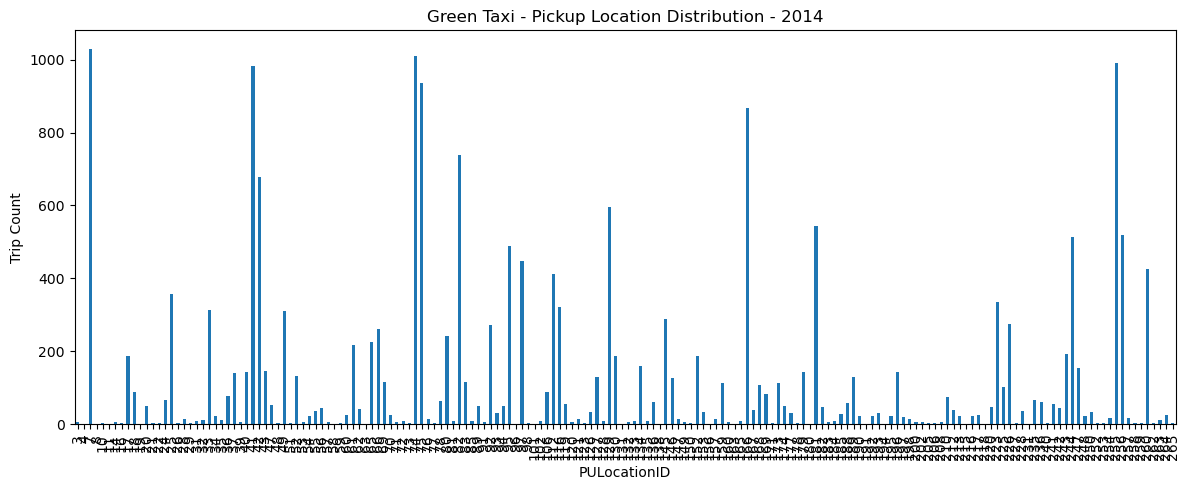

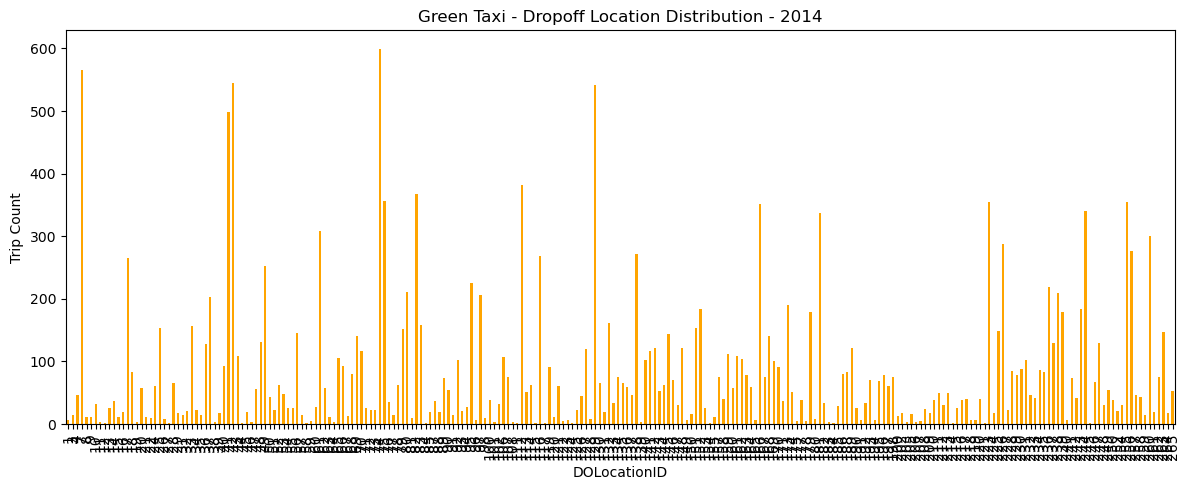

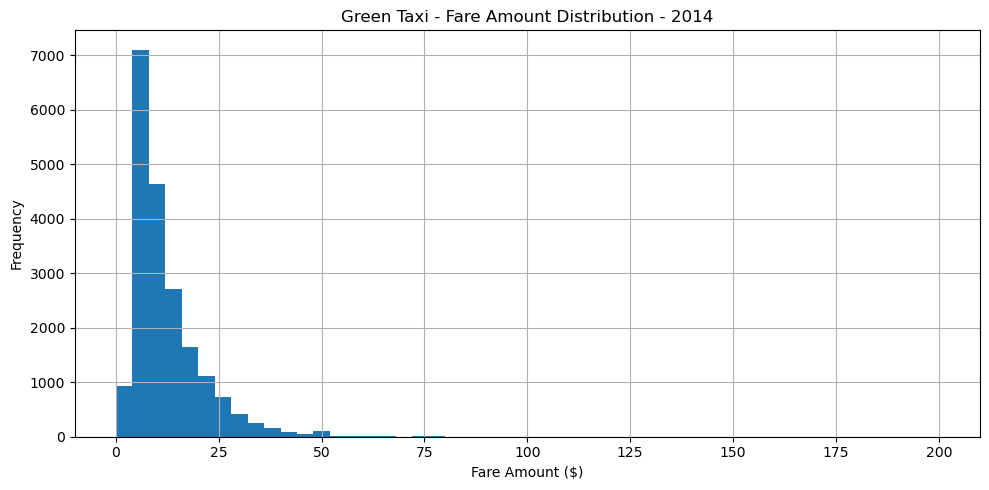

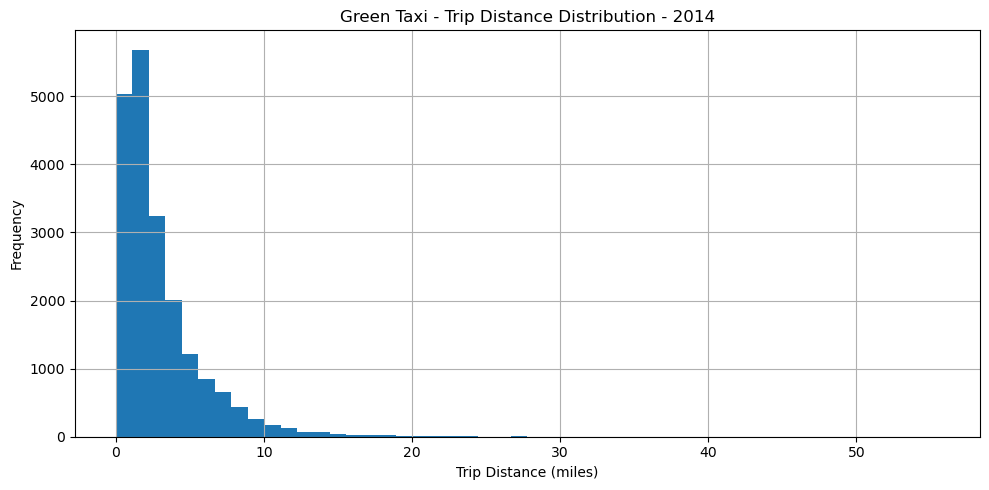


📊 Visualizing 2015...


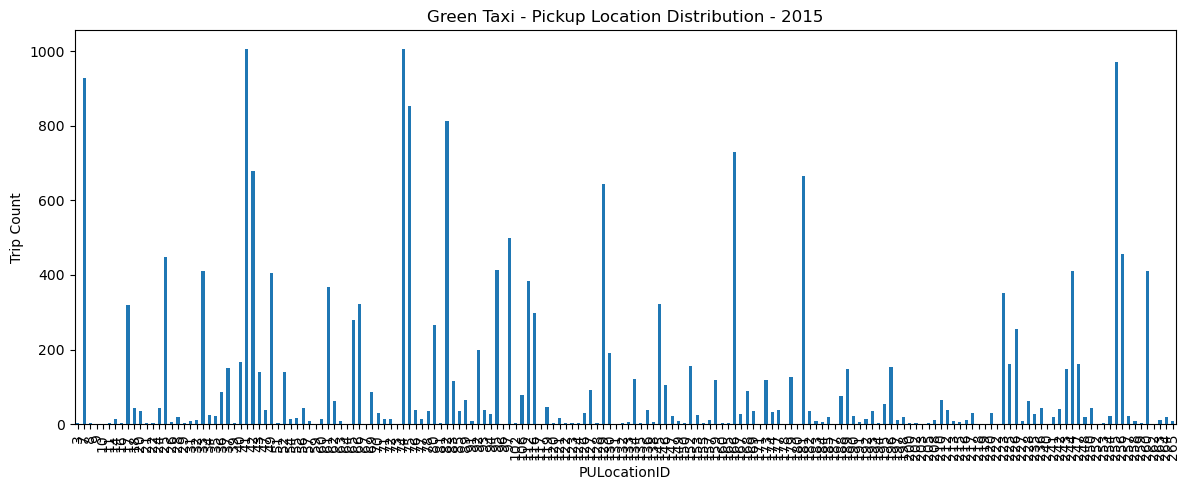

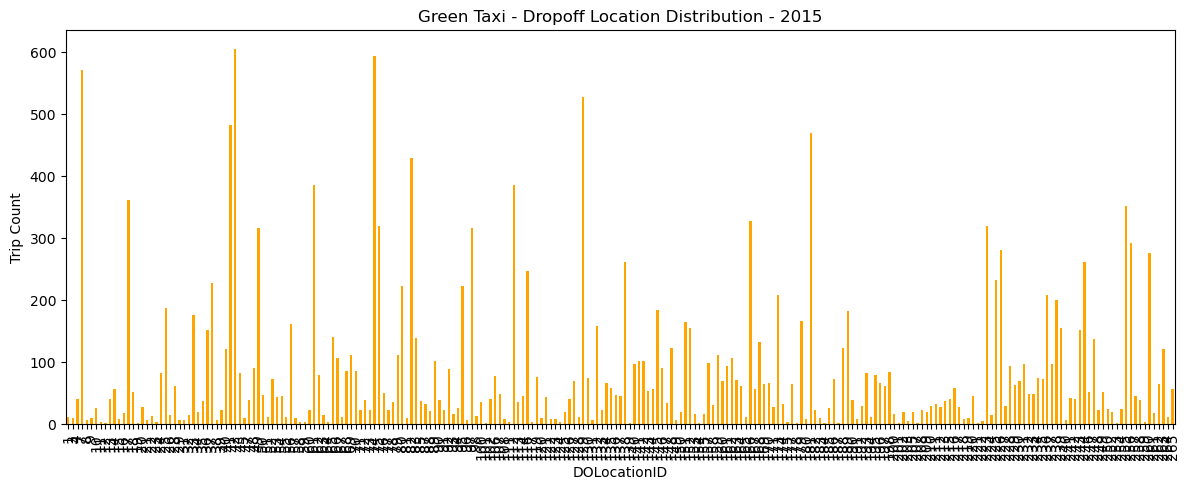

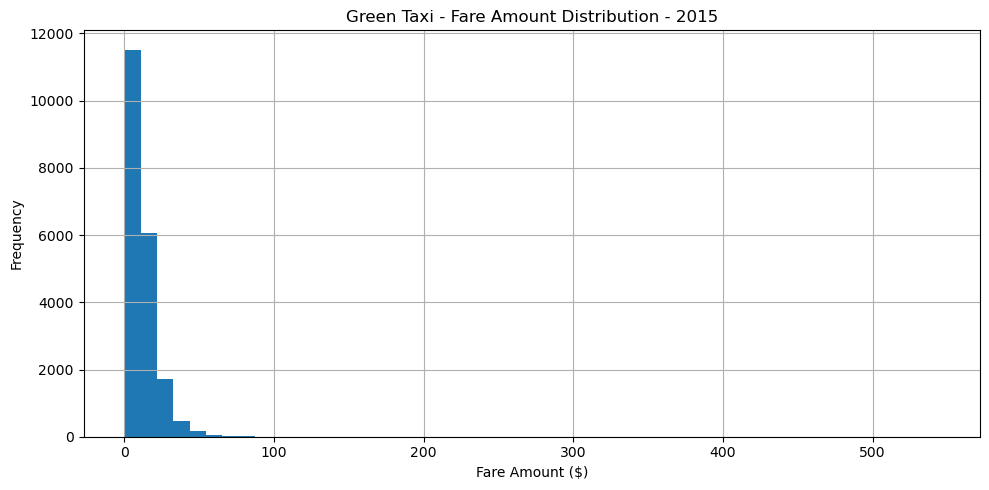

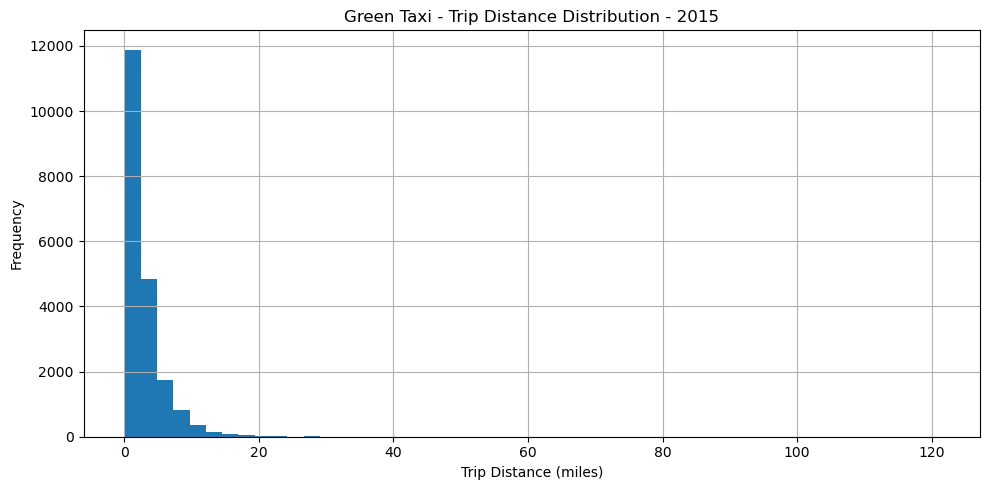


📊 Visualizing 2016...


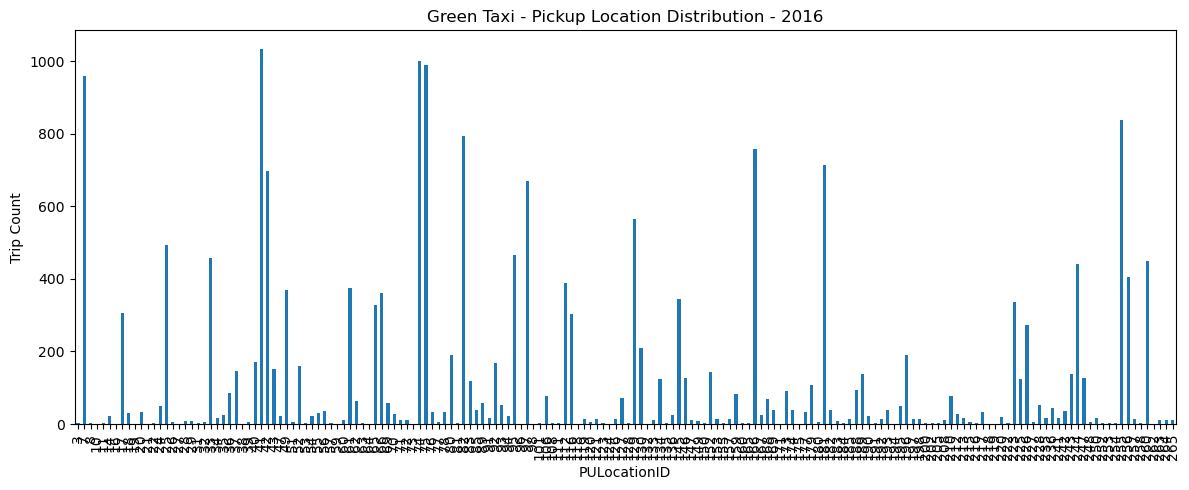

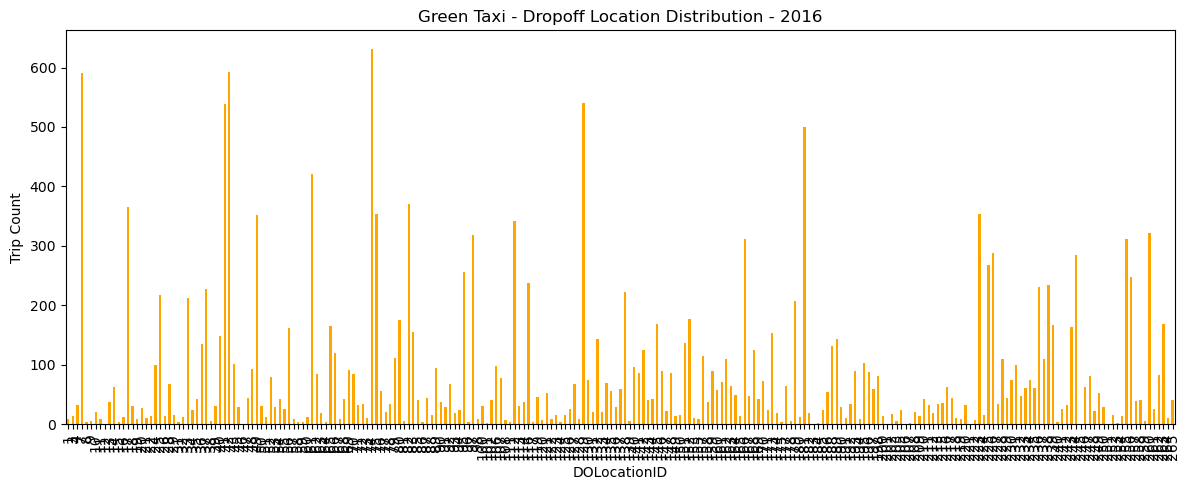

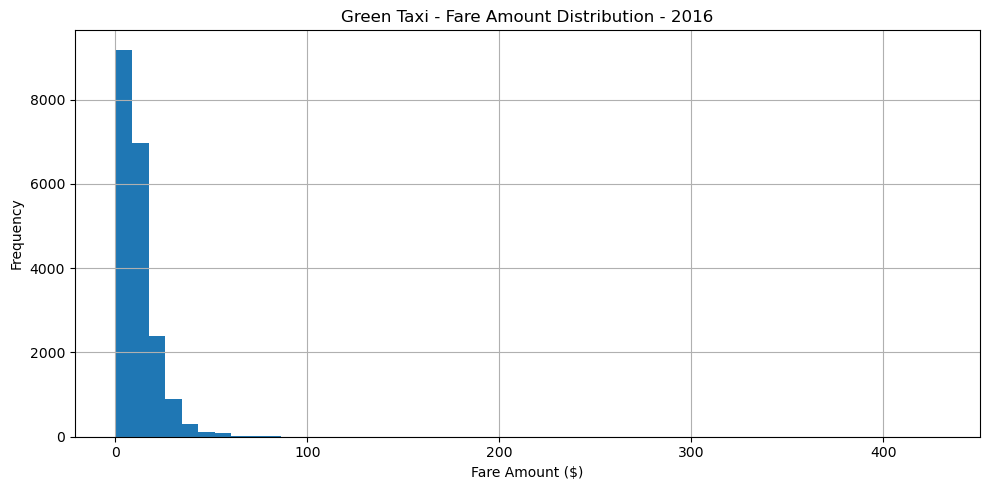

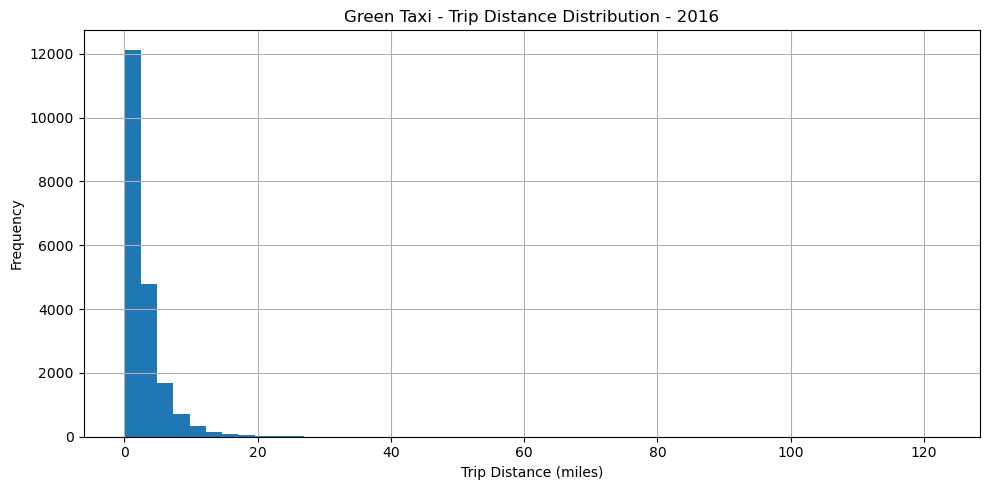


📊 Visualizing 2017...


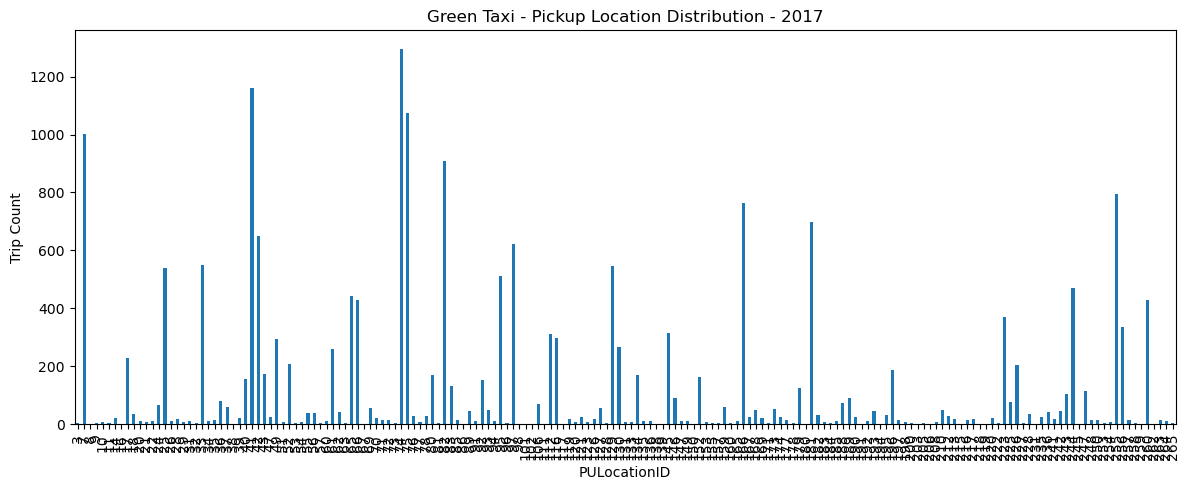

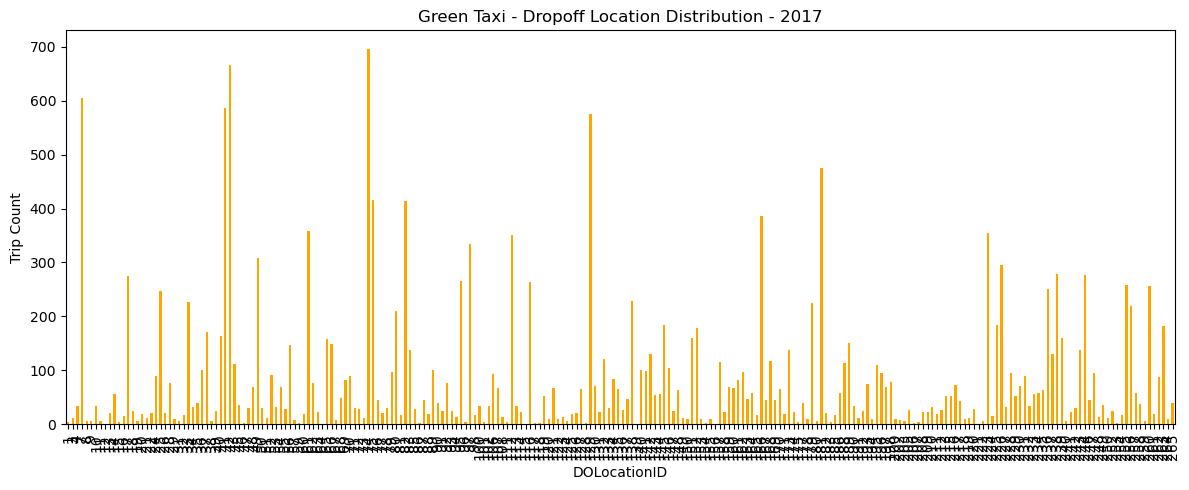

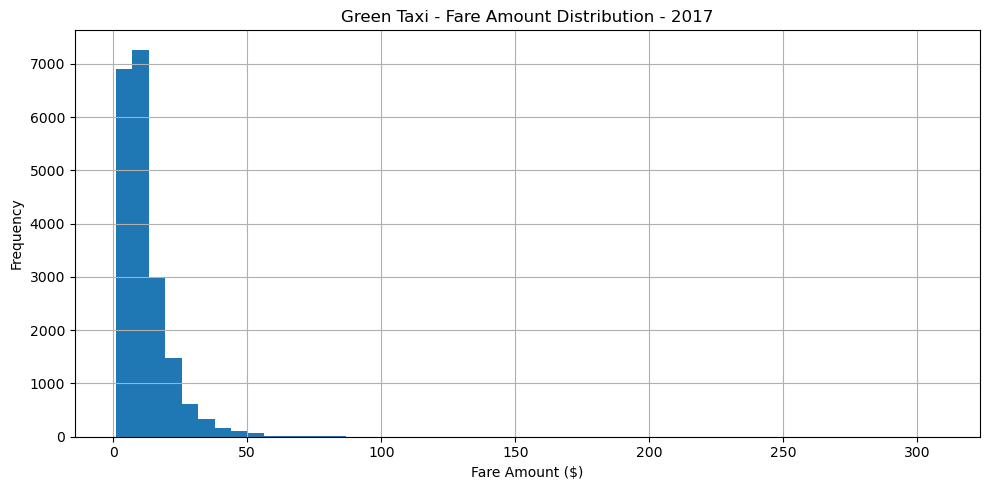

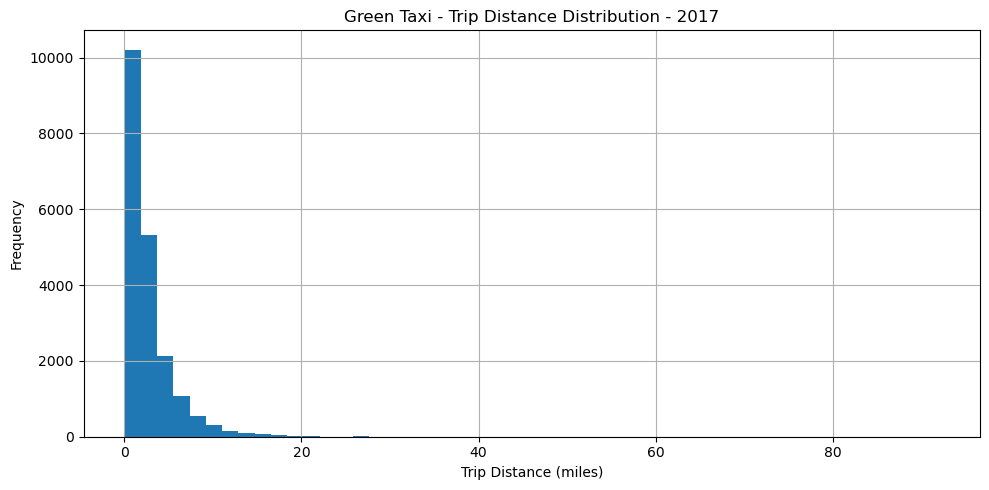


📊 Visualizing 2018...


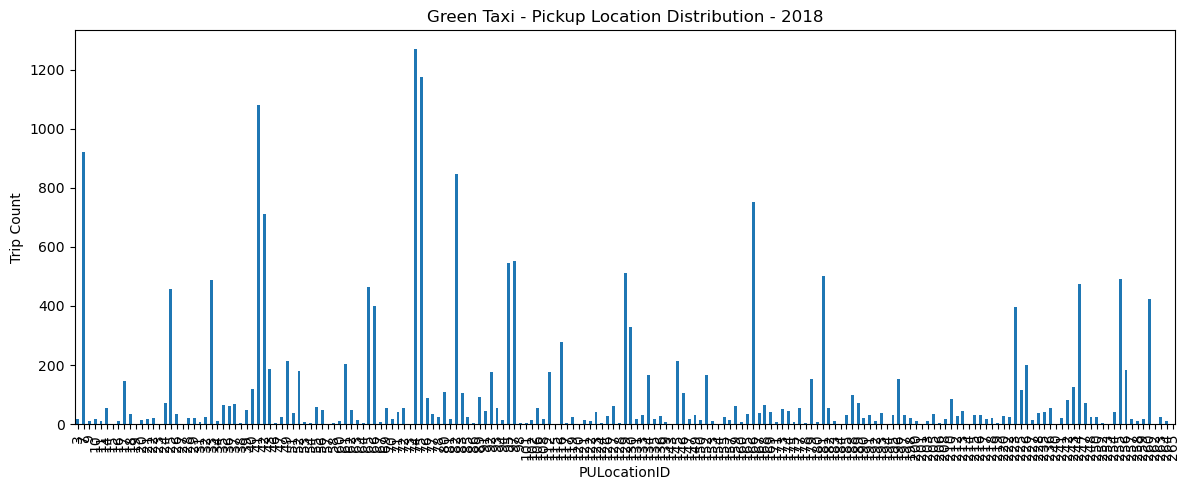

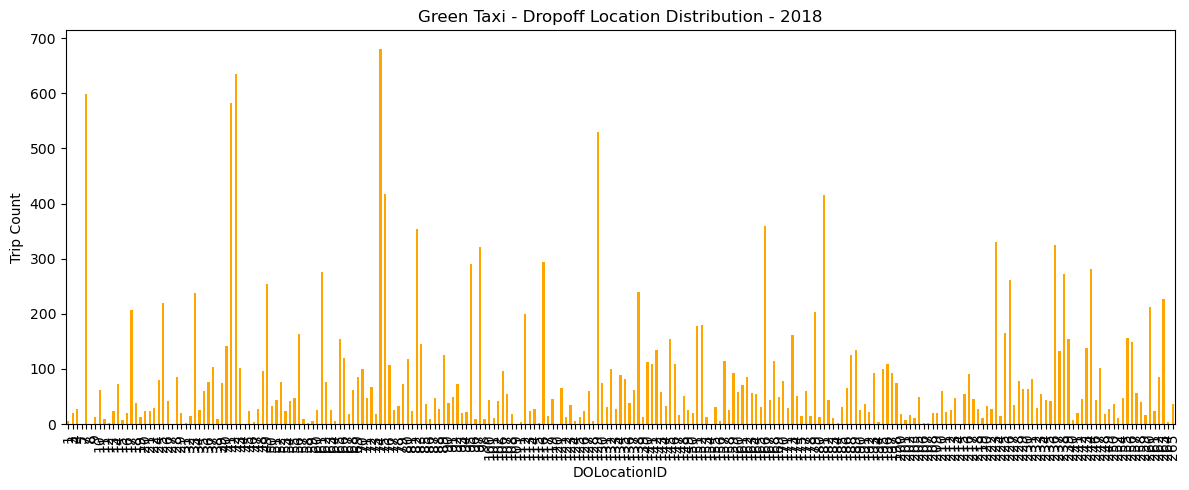

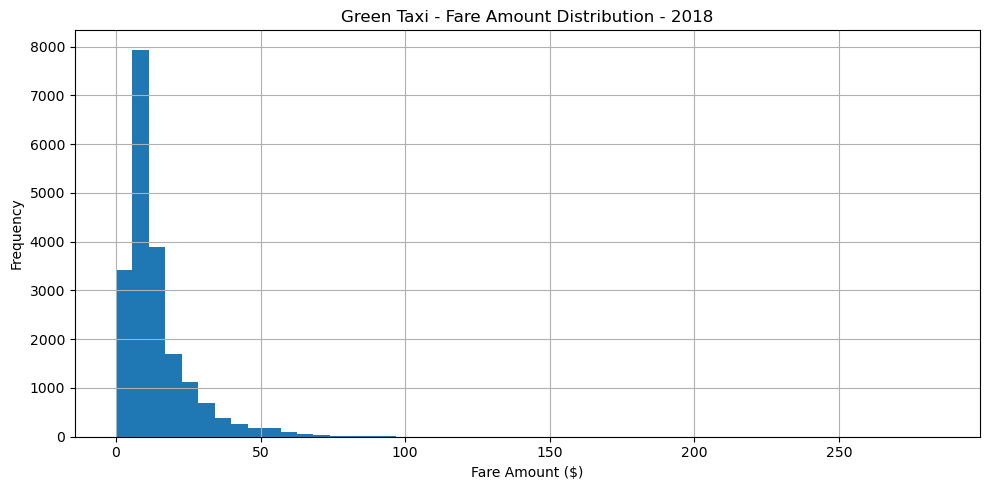

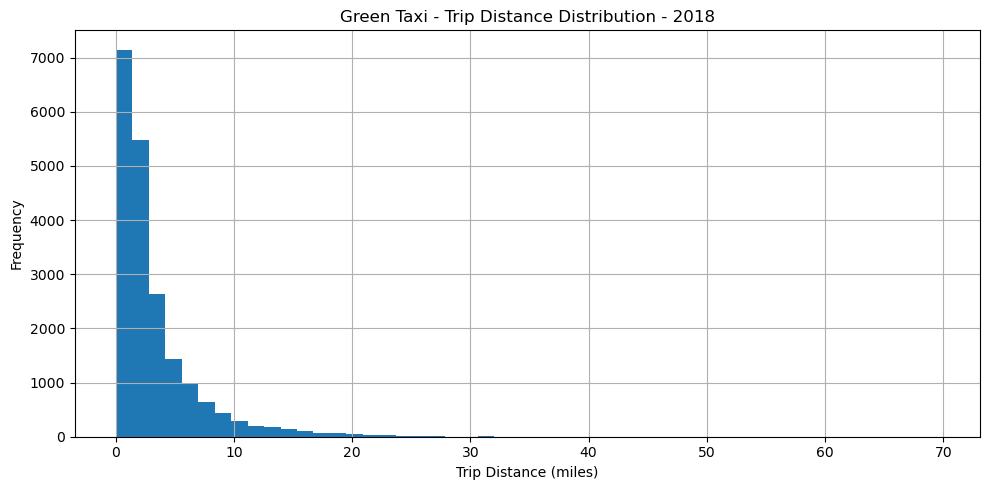


📊 Visualizing 2019...


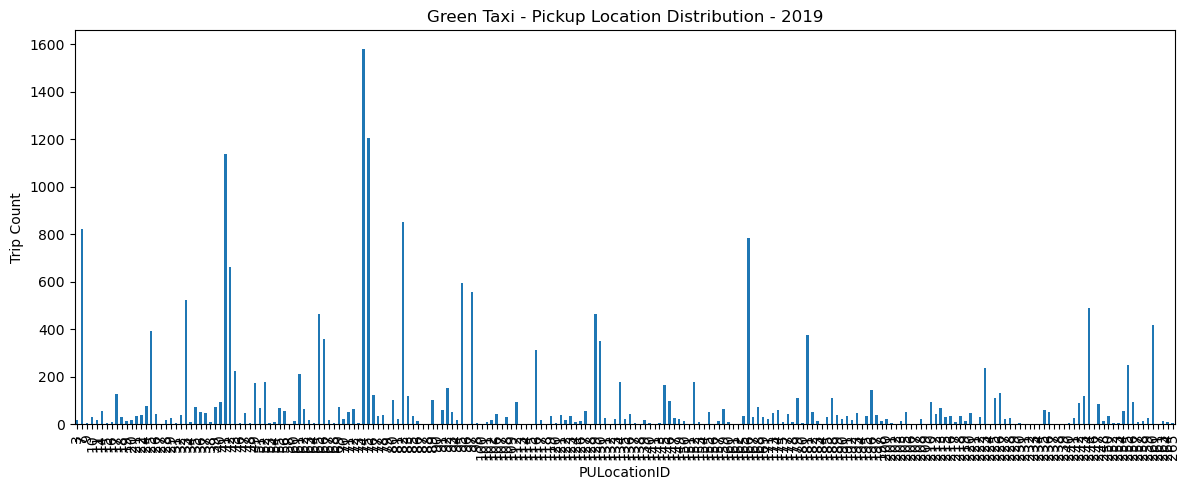

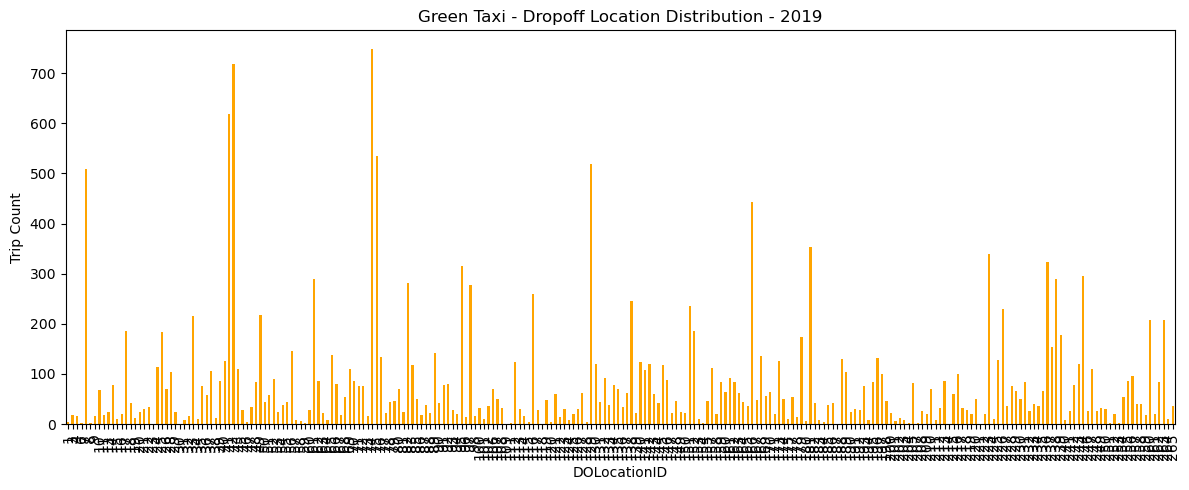

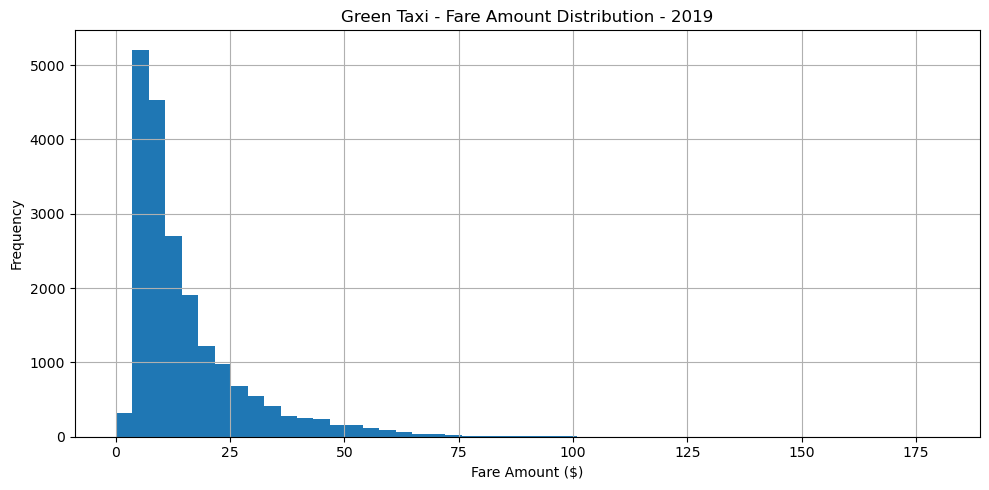

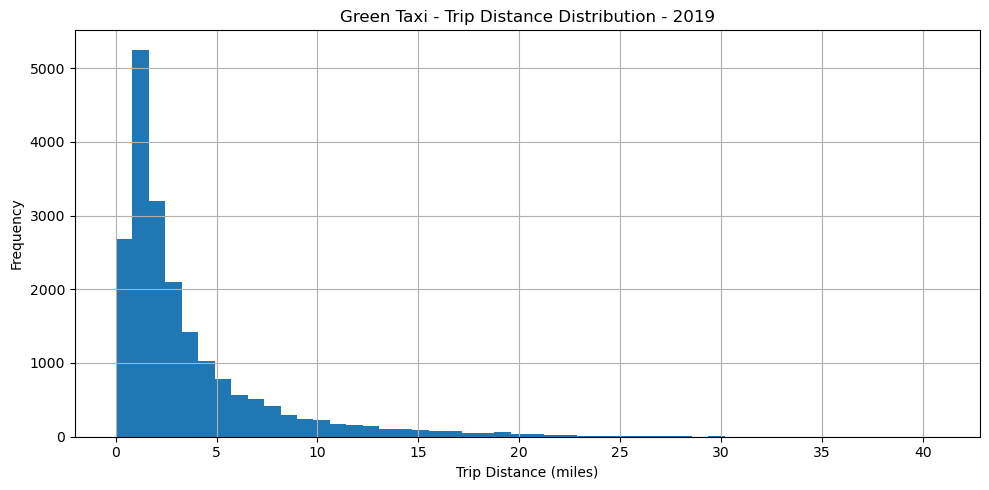


📊 Visualizing 2020...


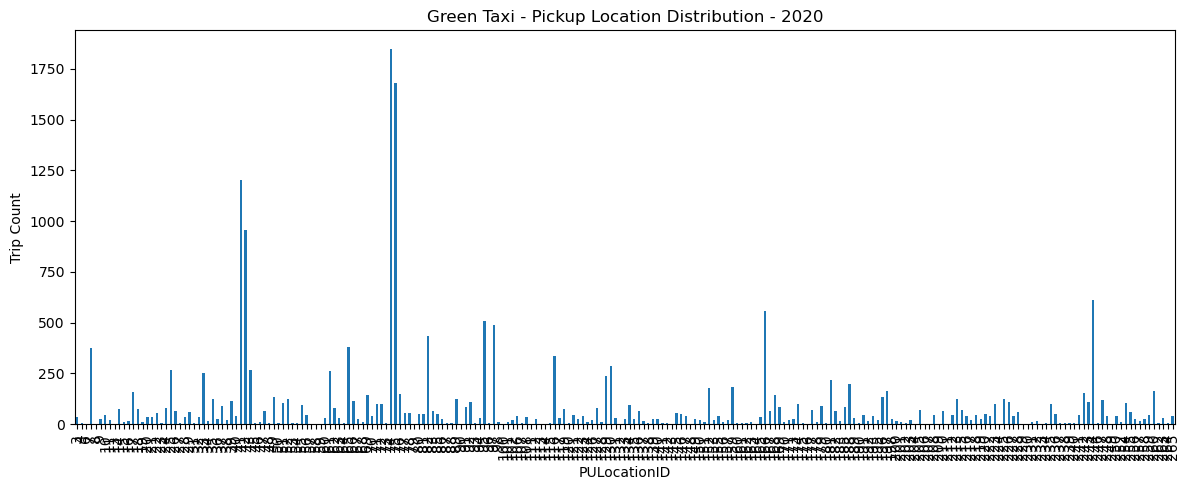

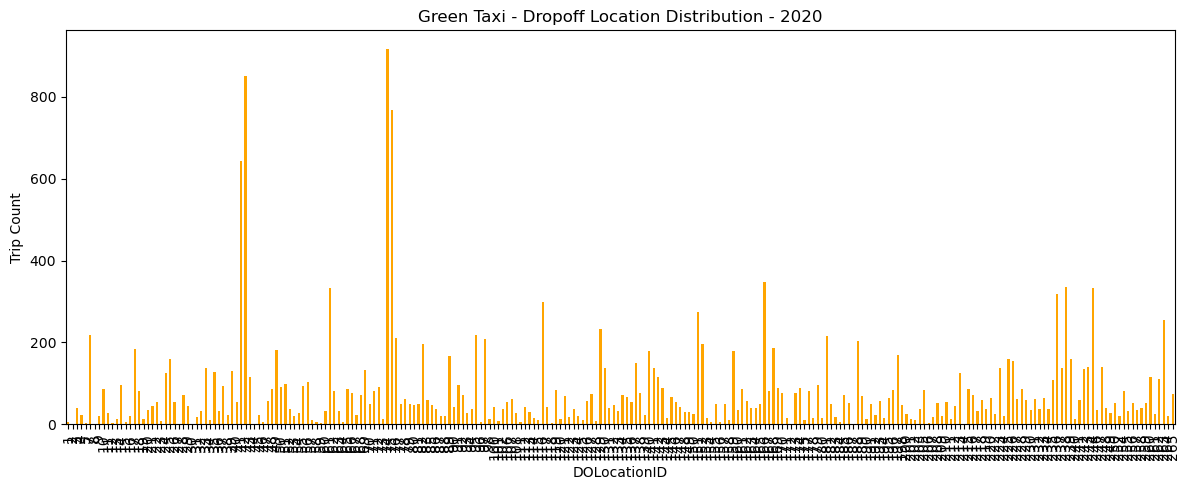

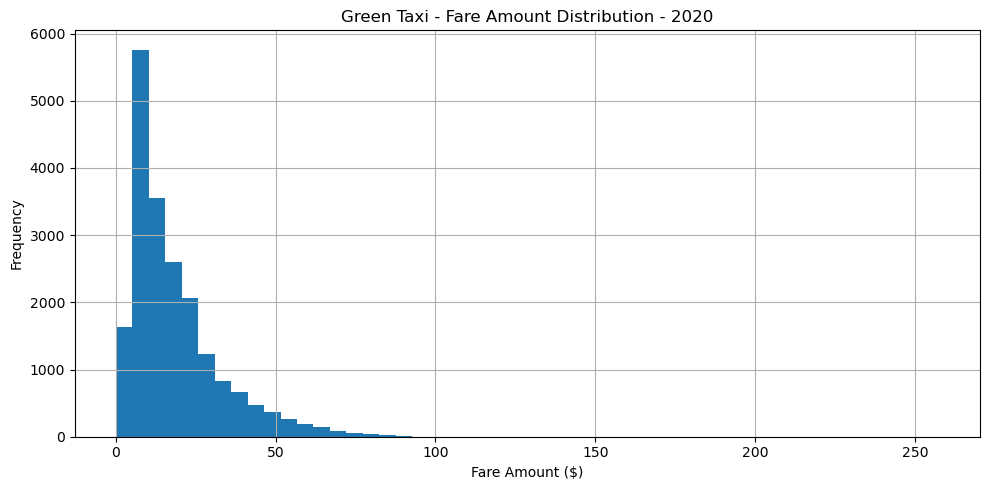

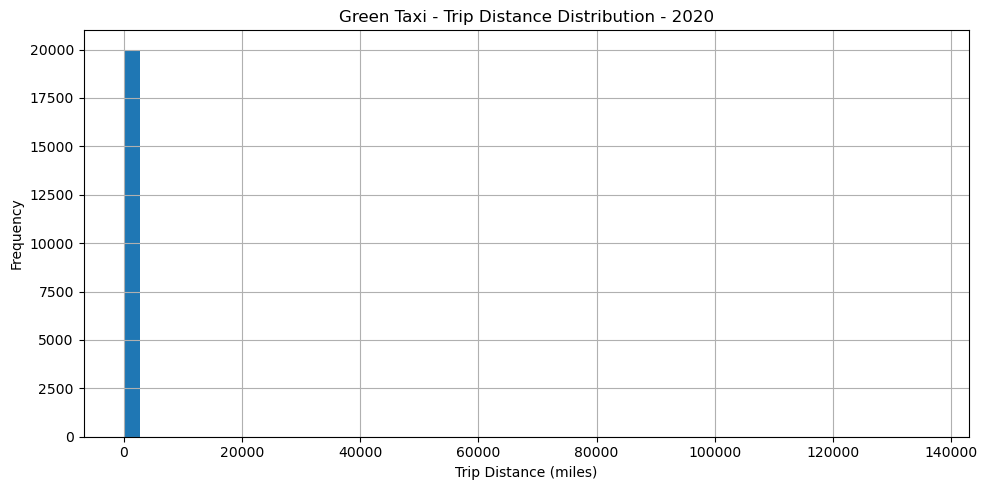


📊 Visualizing 2021...


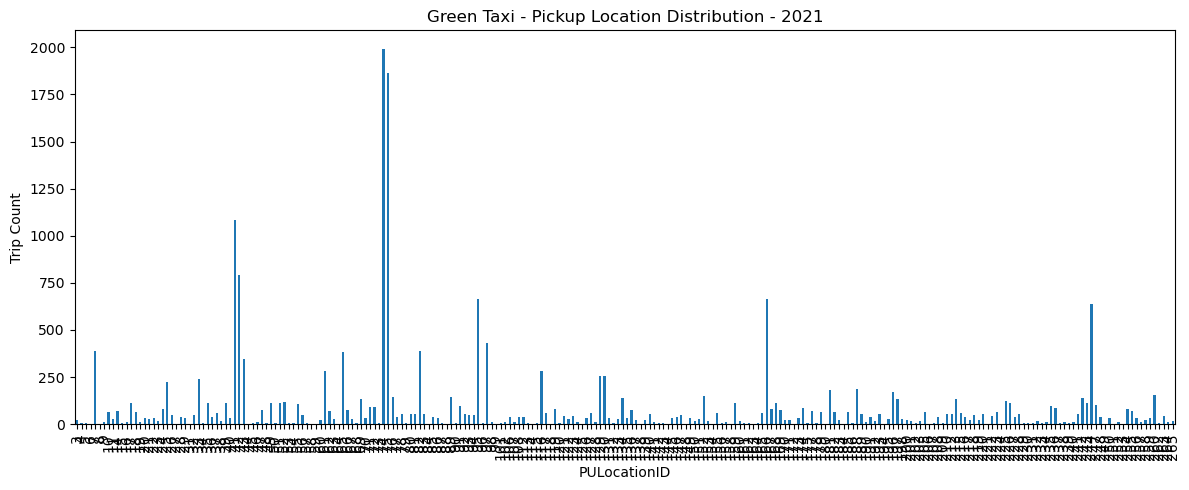

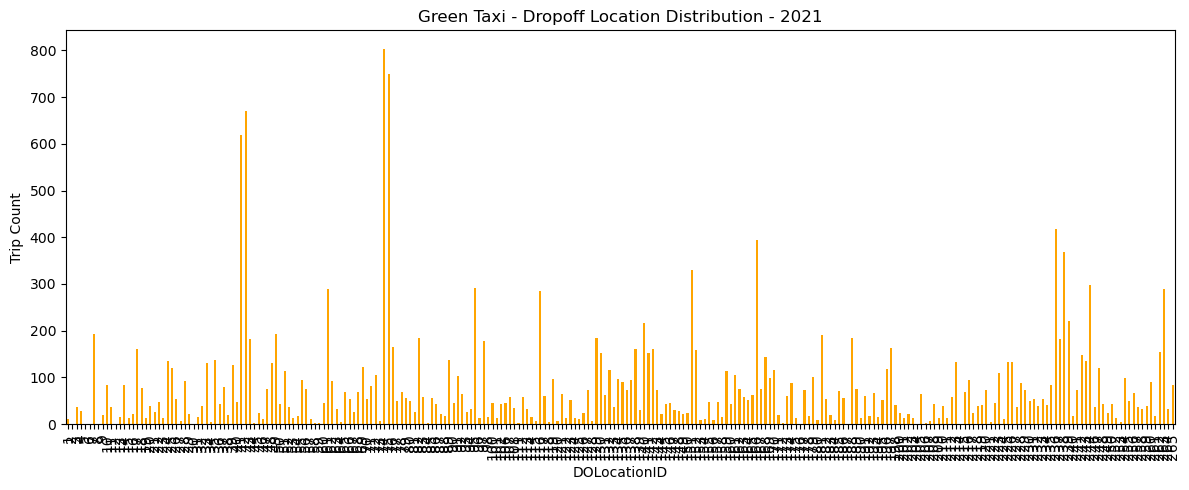

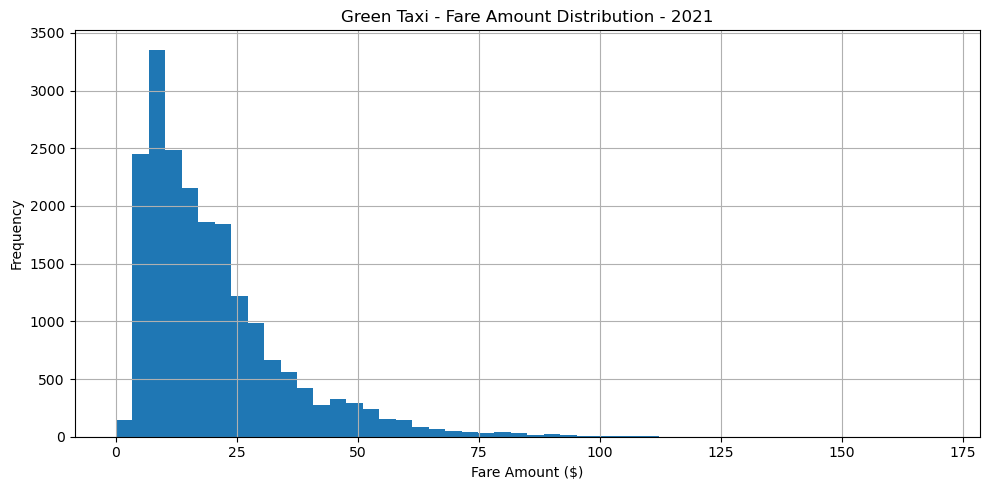

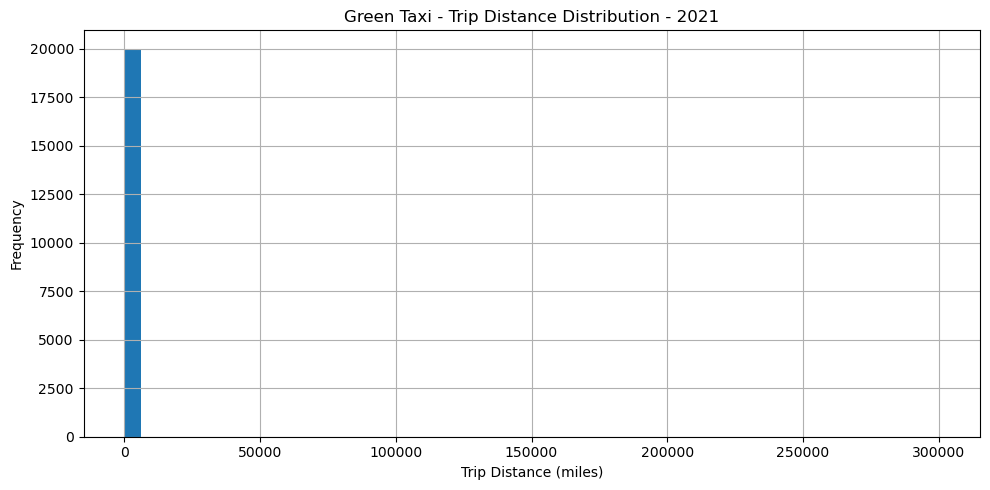


📊 Visualizing 2022...


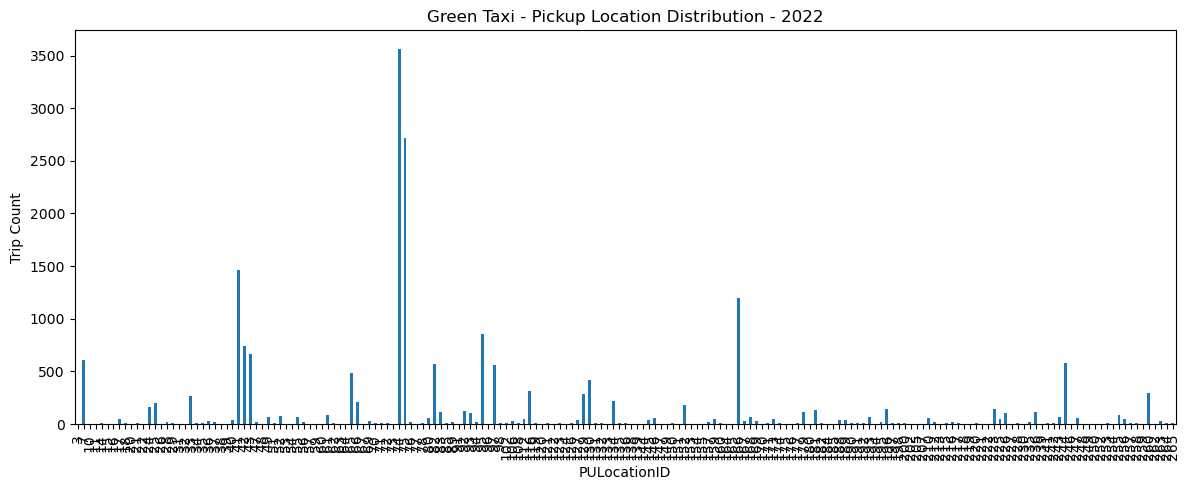

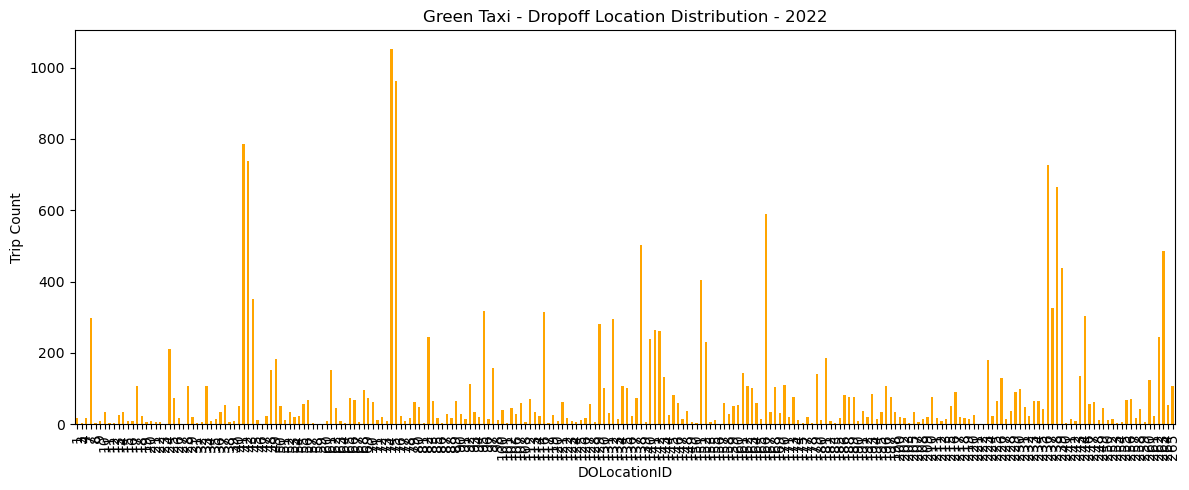

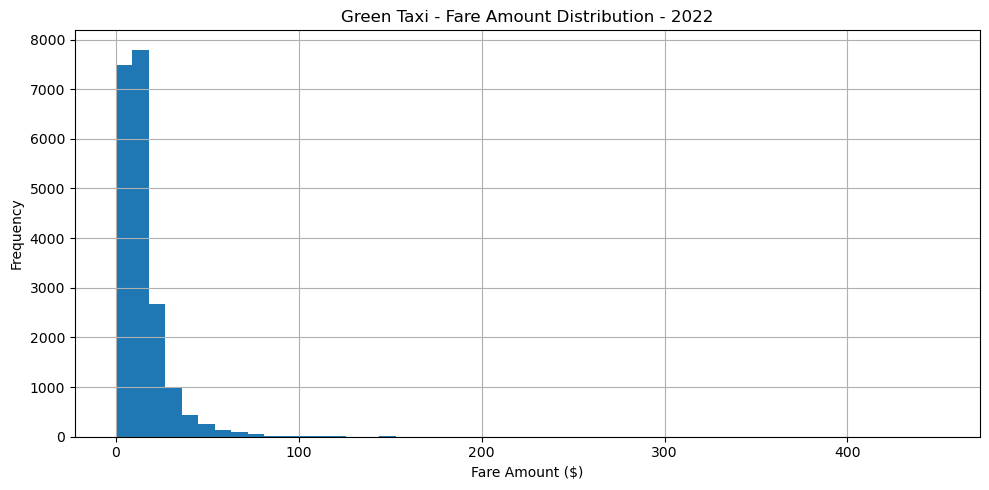

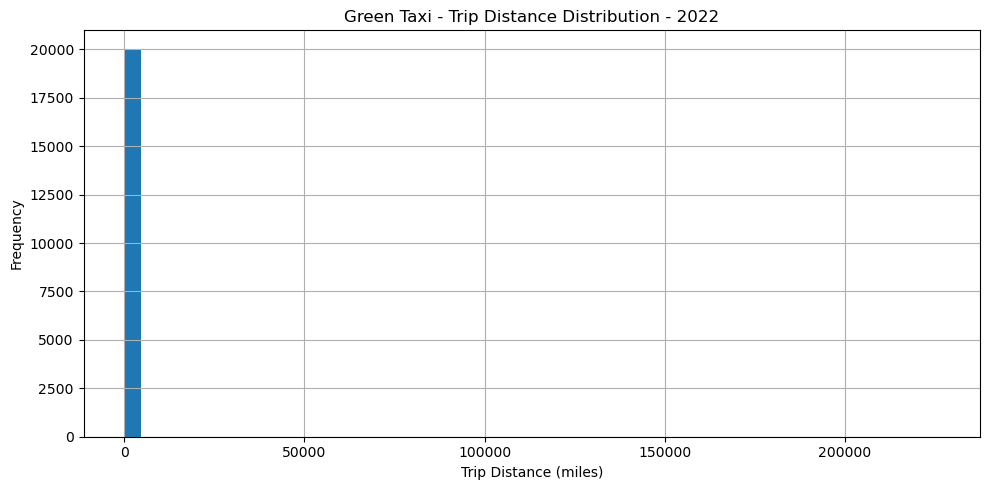


📊 Visualizing 2023...


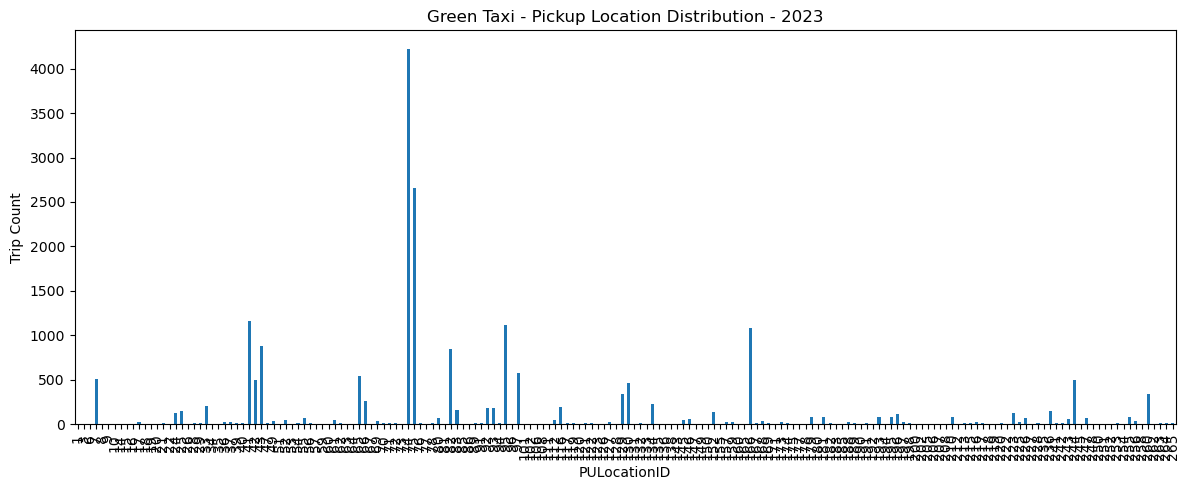

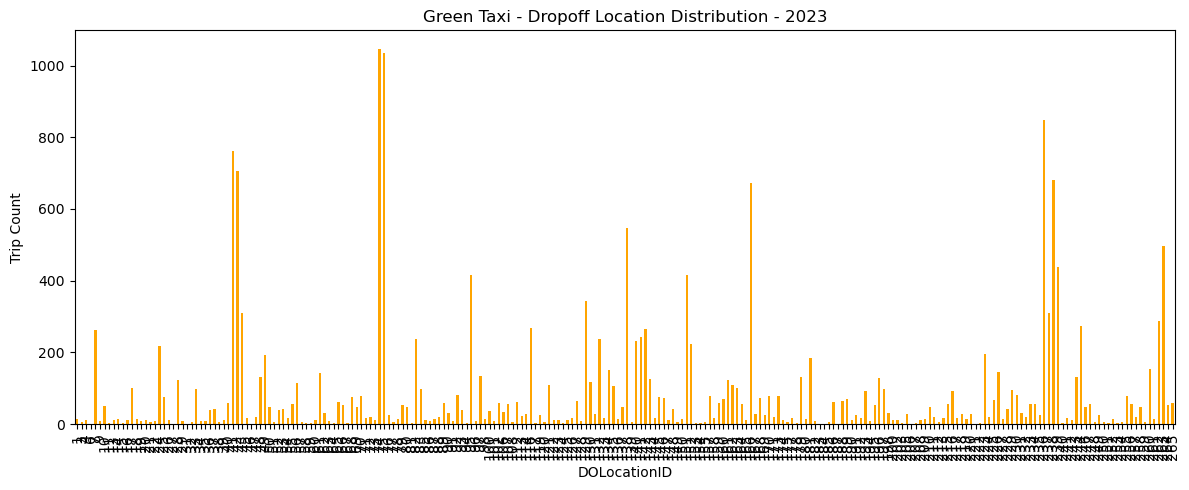

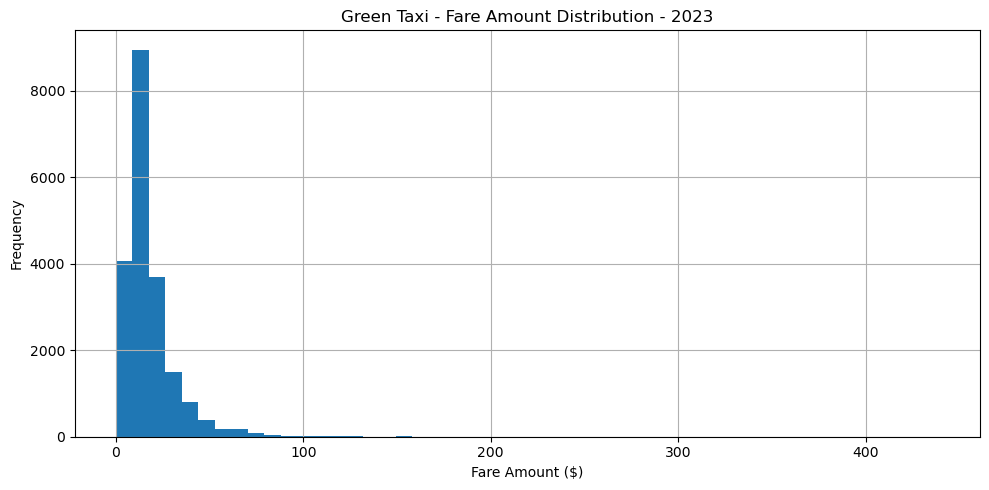

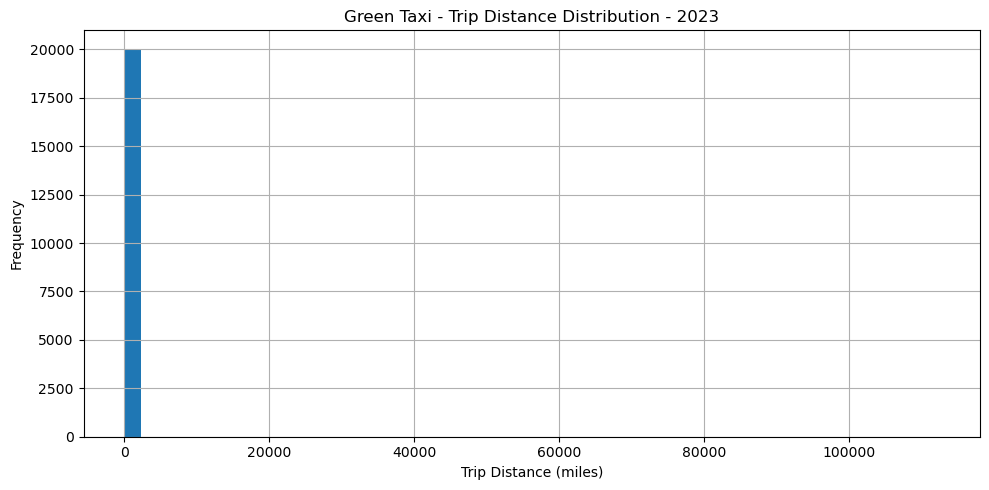

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIGURATION ===
folder = r"D:\MSDS\Network Science\project\greentrips_cleaned_per_year"
years = list(range(2014, 2024))# 2014 to 2023

for year in years:
    print(f"\n📊 Visualizing {year}...")
    file_path = os.path.join(folder, f"green_tripdata_{year}_cleaned.csv")
    
    try:
        df = pd.read_csv(file_path)
        
        # 1️⃣ Pickup distribution
        plt.figure(figsize=(12, 5))
        df['PULocationID'].value_counts().sort_index().plot(kind='bar')
        plt.title(f'Green Taxi - Pickup Location Distribution - {year}')
        plt.xlabel('PULocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        
        # 2️⃣ Dropoff distribution
        plt.figure(figsize=(12, 5))
        df['DOLocationID'].value_counts().sort_index().plot(kind='bar', color='orange')
        plt.title(f'Green Taxi - Dropoff Location Distribution - {year}')
        plt.xlabel('DOLocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        
        # 3️⃣ Fare amount distribution
        plt.figure(figsize=(10, 5))
        df['fare_amount'].dropna().hist(bins=50)
        plt.title(f'Green Taxi - Fare Amount Distribution - {year}')
        plt.xlabel('Fare Amount ($)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # 🚗 (Optional) Trip distance distribution
        if 'trip_distance' in df.columns:
            plt.figure(figsize=(10, 5))
            df['trip_distance'].dropna().hist(bins=50)
            plt.title(f'Green Taxi - Trip Distance Distribution - {year}')
            plt.xlabel('Trip Distance (miles)')
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"❗ Error processing {file_path}: {e}")


In [24]:
import pandas as pd
import os

# Set up paths
input_folder = r"D:\MSDS\Network Science\project\yellow_combined_data_sampled"
output_folder = r"D:\MSDS\Network Science\project\yellowtrips_cleaned_per_year"
os.makedirs(output_folder, exist_ok=True)

# Years you have (starting from 2015 based on your file pattern)
years = list(range(2015, 2025))  # 2015 to 2024

# Sampling target
target_rows = 20000

# Define expected columns
expected_columns = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'PULocationID', 'DOLocationID', 'trip_distance',
    'fare_amount', 'tip_amount', 'total_amount'
]

# Function to clean data
def clean_yellow_data(df):
    df = df.dropna(subset=['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount'])
    df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
    df = df.drop_duplicates()
    return df

# Loop over years
for year in years:
    print(f"\nProcessing year: {year}")
    year_files = []
    
    # Batch 1: 01_to_04
    batch1 = f'yellow_tripdata_{year}-01_to_{year}-04_sampled.csv'
    # Batch 2: 05_to_08
    batch2 = f'yellow_tripdata_{year}-05_to_{year}-08_sampled.csv'
    # Batch 3: 09_to_12
    batch3 = f'yellow_tripdata_{year}-09_to_{year}-12_sampled.csv'
    
    for file_name in [batch1, batch2, batch3]:
        file_path = os.path.join(input_folder, file_name)
        if os.path.exists(file_path):
            year_files.append(file_path)
        else:
            print(f"  ⚠️ File not found: {file_name}")
    
    if not year_files:
        print(f"  ❗ No files found for {year}. Skipping.")
        continue

    # Combine all batches for the year
    combined_df = pd.DataFrame()
    for f in year_files:
        print(f"  Reading {os.path.basename(f)}")
        df = pd.read_csv(f)
        
        if not all(col in df.columns for col in expected_columns):
            print(f"    ⚠️ Columns mismatch in {os.path.basename(f)}. Skipping this file.")
            continue
        
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        print(f"    ✅ Loaded {len(df)} rows.")
    
    print(f"  Combined total rows before cleaning: {len(combined_df)}")
    
    # Clean
    cleaned_df = clean_yellow_data(combined_df)
    print(f"  Cleaned rows: {len(cleaned_df)}")
    
    # Sample down to 20k if needed
    if len(cleaned_df) > target_rows:
        cleaned_df = cleaned_df.sample(n=target_rows, random_state=42)
        print(f"  Sampled down to {target_rows} rows.")
    
    # Save
    output_path = os.path.join(output_folder, f"yellow_tripdata_{year}_cleaned.csv")
    cleaned_df.to_csv(output_path, index=False)
    print(f"  💾 Saved cleaned file: {output_path}")



Processing year: 2015
  Reading yellow_tripdata_2015-01_to_2015-04_sampled.csv
    ✅ Loaded 40000 rows.
  Reading yellow_tripdata_2015-05_to_2015-08_sampled.csv
    ✅ Loaded 40000 rows.
  Reading yellow_tripdata_2015-09_to_2015-12_sampled.csv
    ✅ Loaded 40000 rows.
  Combined total rows before cleaning: 120000
  Cleaned rows: 119203
  Sampled down to 20000 rows.
  💾 Saved cleaned file: D:\MSDS\Network Science\project\yellowtrips_cleaned_per_year\yellow_tripdata_2015_cleaned.csv

Processing year: 2016
  Reading yellow_tripdata_2016-01_to_2016-04_sampled.csv
    ✅ Loaded 40000 rows.
  Reading yellow_tripdata_2016-05_to_2016-08_sampled.csv
    ✅ Loaded 40000 rows.
  Reading yellow_tripdata_2016-09_to_2016-12_sampled.csv
    ✅ Loaded 40000 rows.
  Combined total rows before cleaning: 120000
  Cleaned rows: 119262
  Sampled down to 20000 rows.
  💾 Saved cleaned file: D:\MSDS\Network Science\project\yellowtrips_cleaned_per_year\yellow_tripdata_2016_cleaned.csv

Processing year: 2017
  Rea


📊 Visualizing 2015...


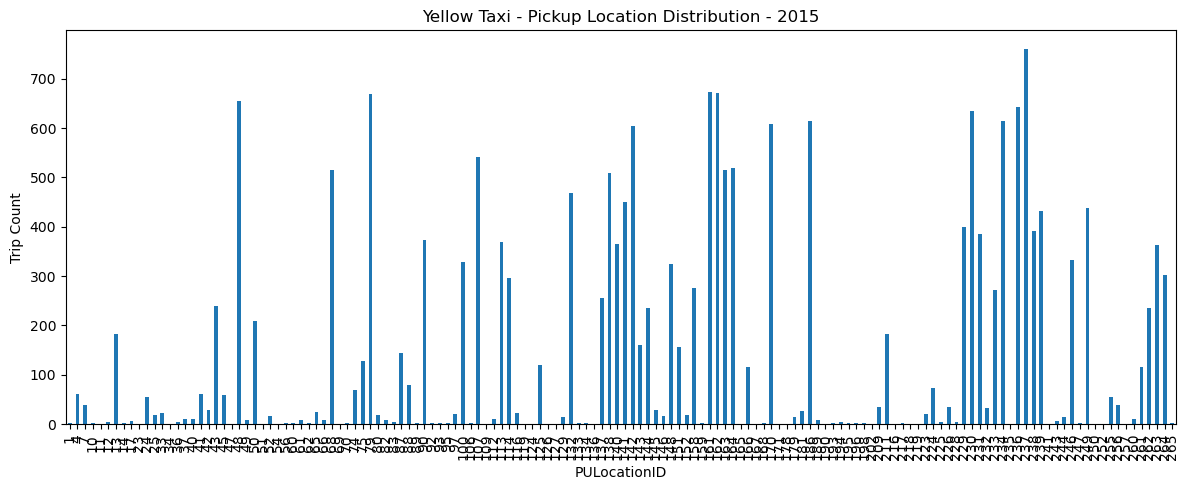

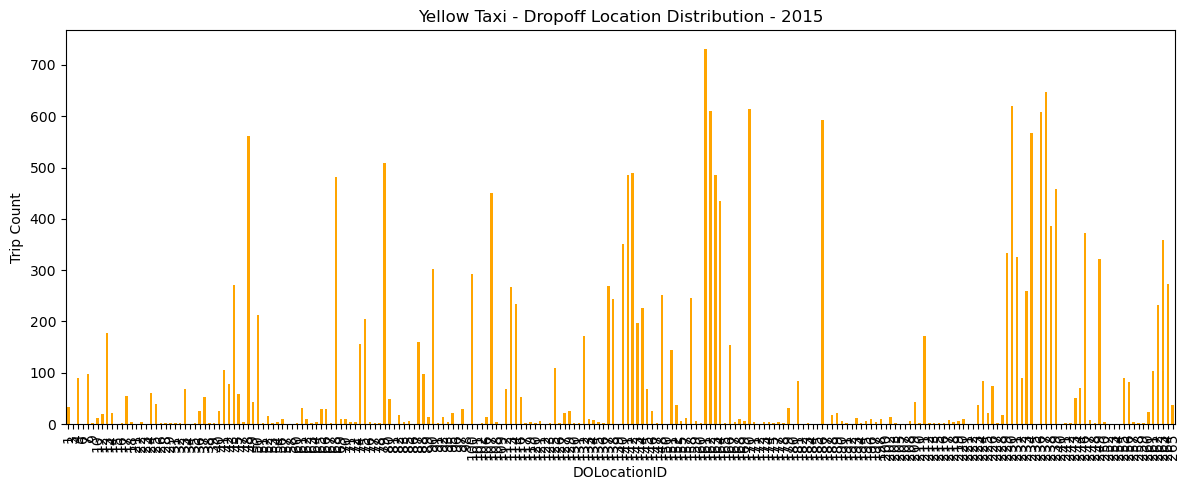

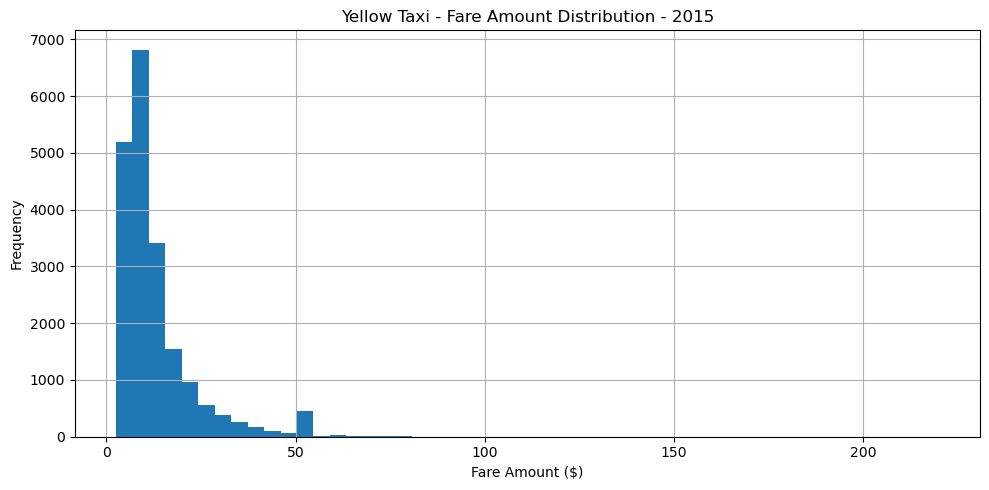

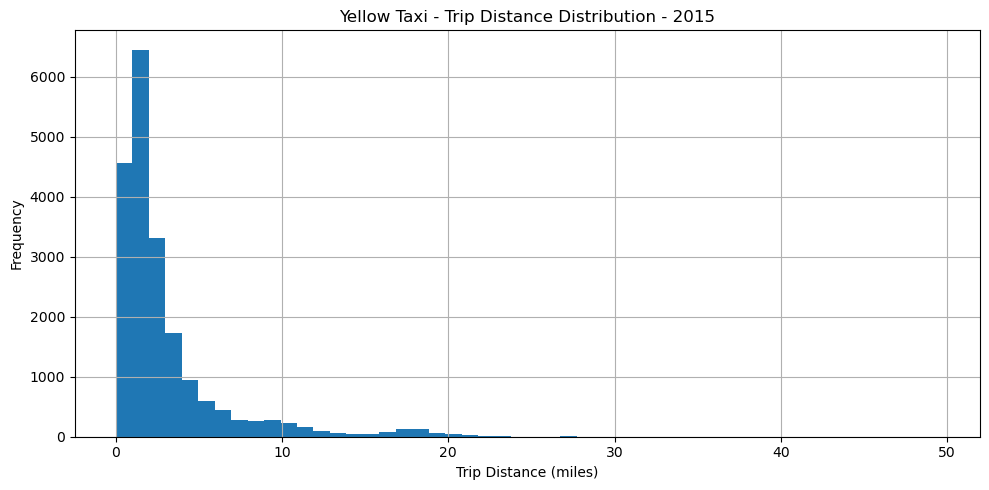


📊 Visualizing 2016...


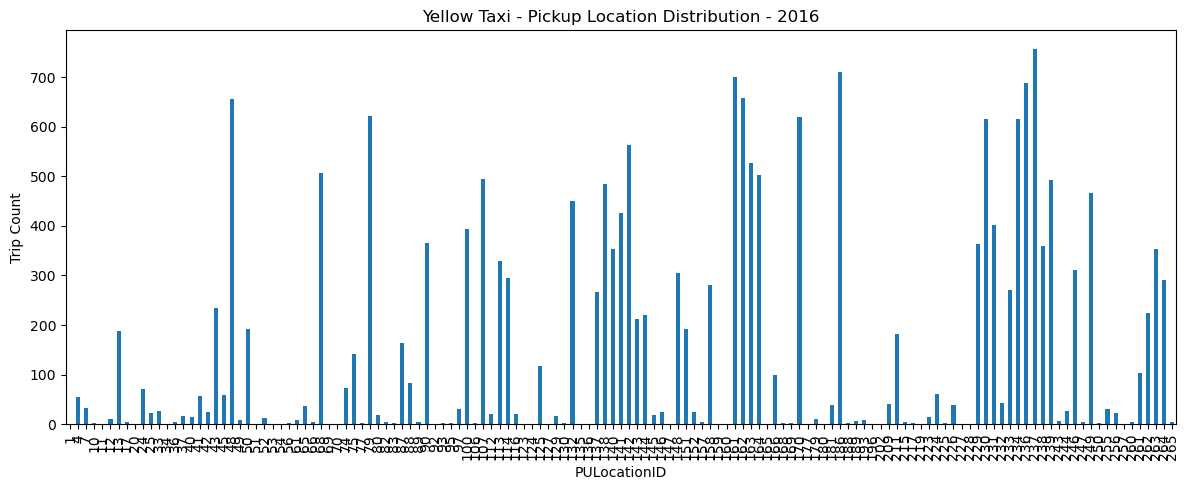

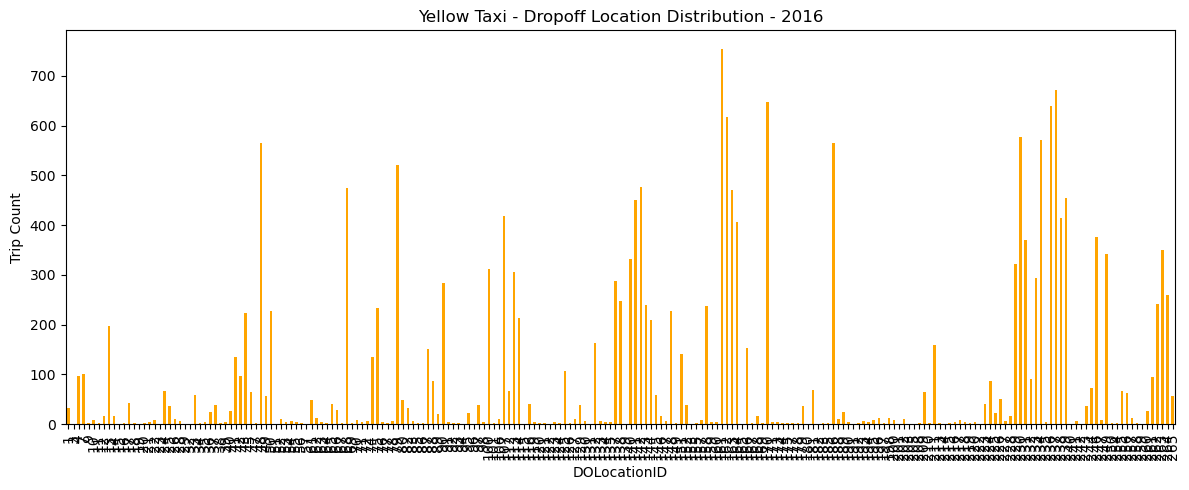

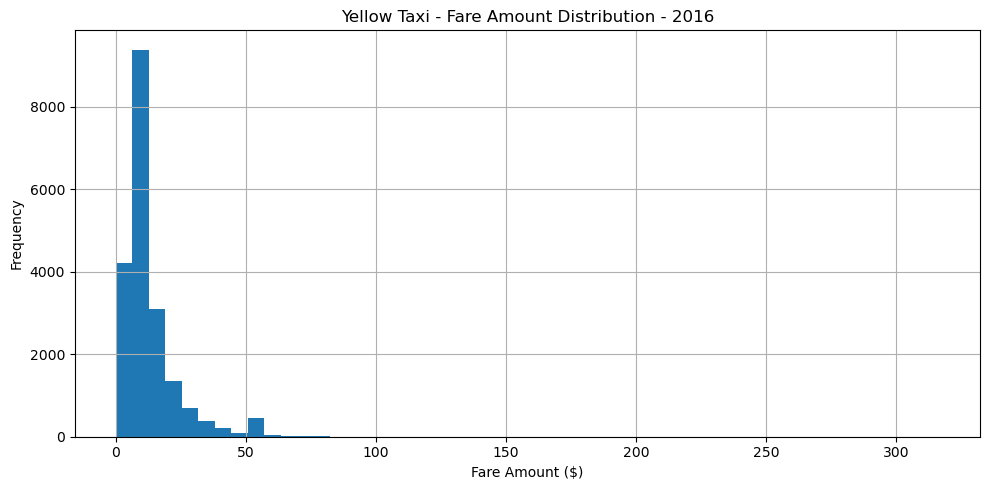

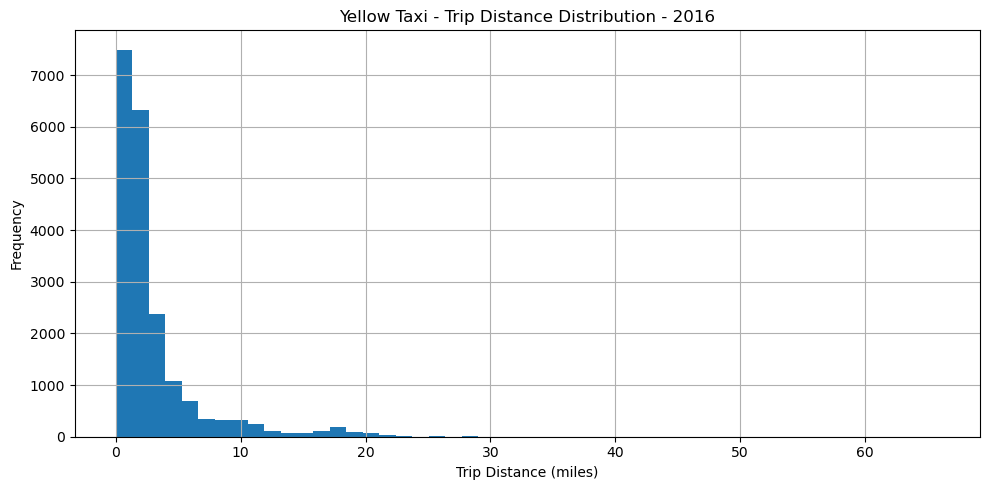


📊 Visualizing 2017...


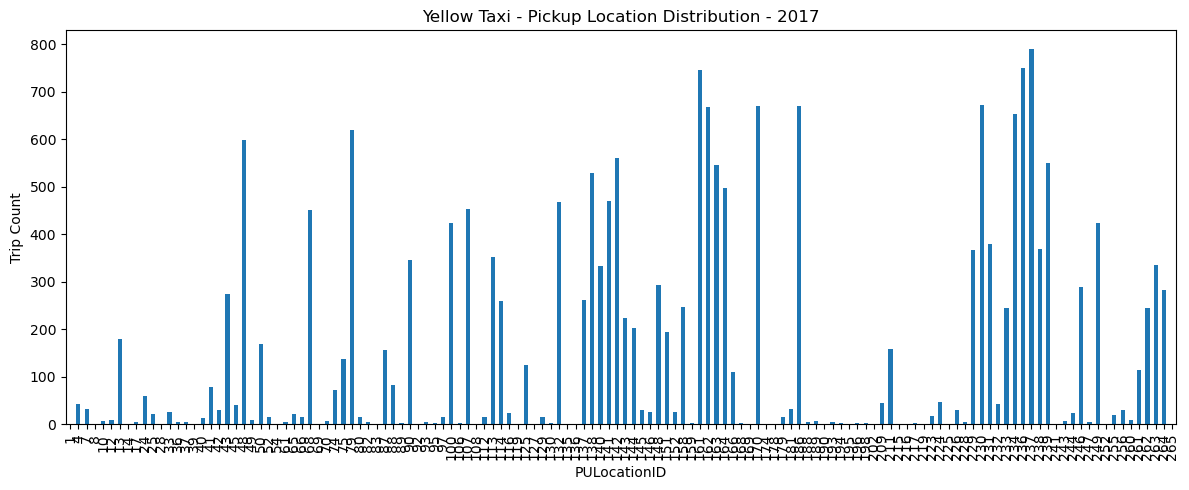

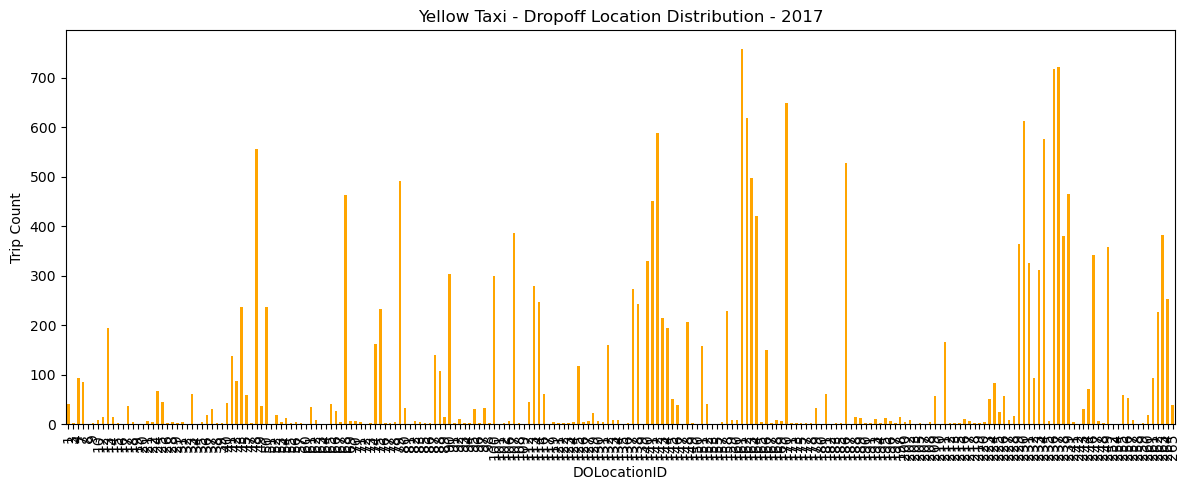

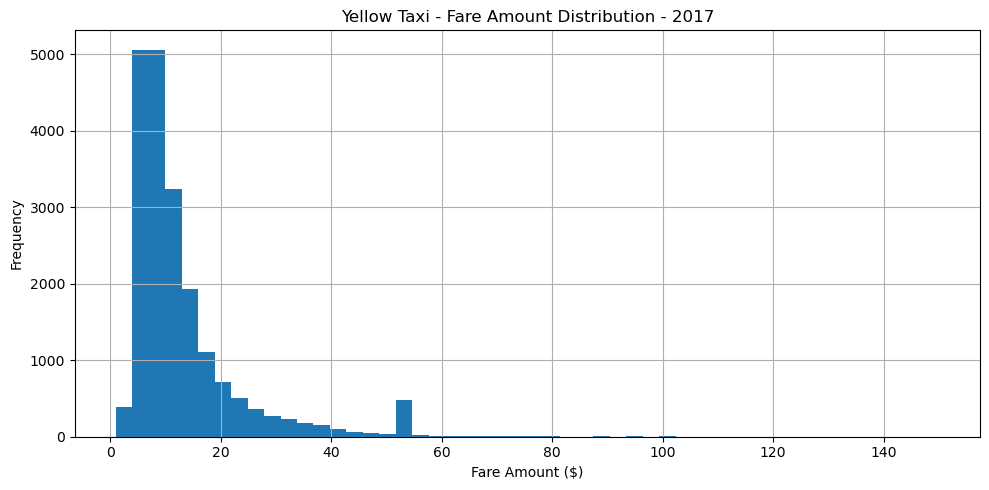

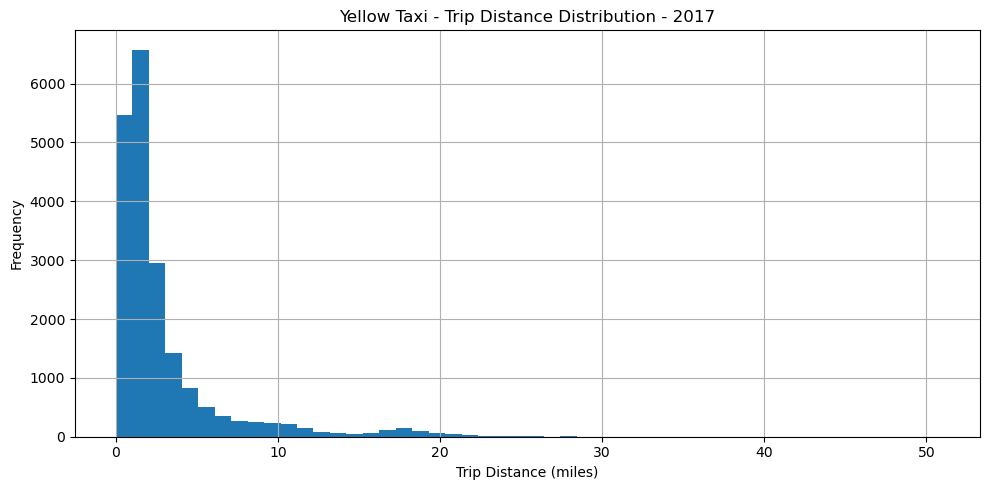


📊 Visualizing 2018...


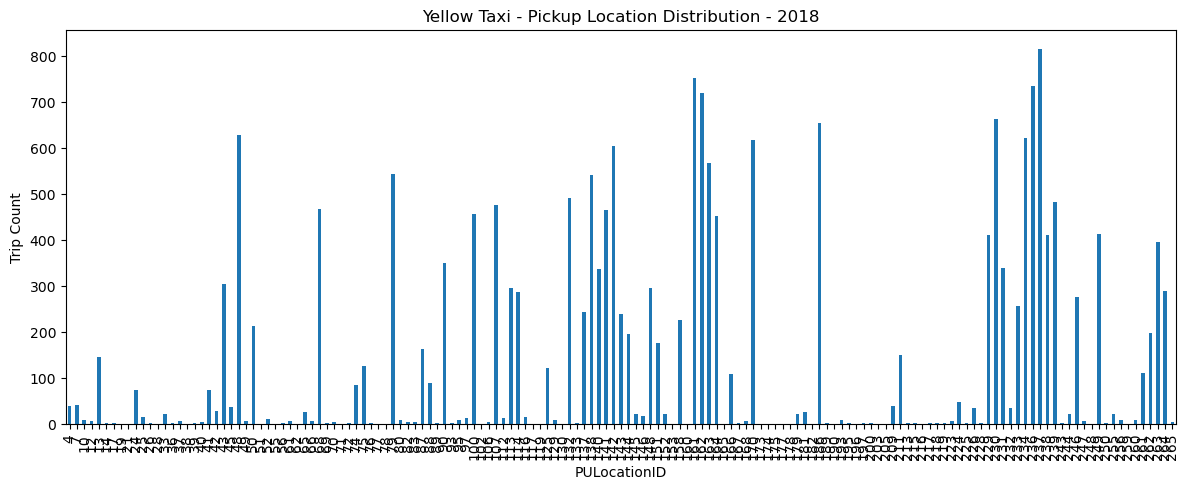

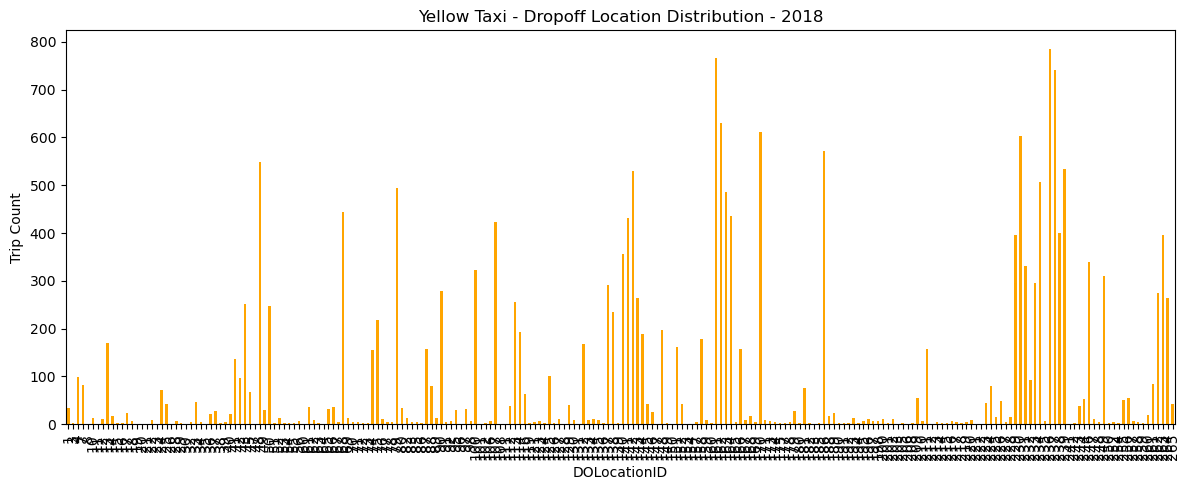

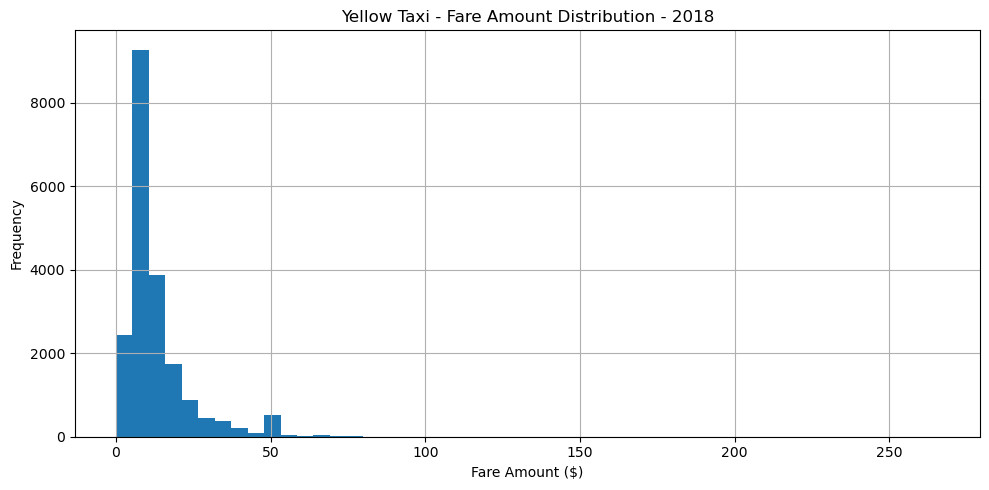

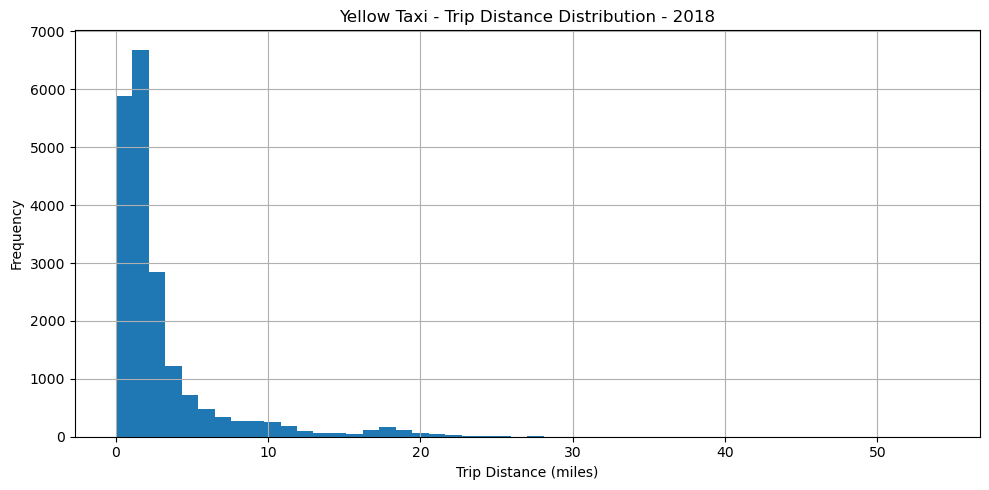


📊 Visualizing 2019...


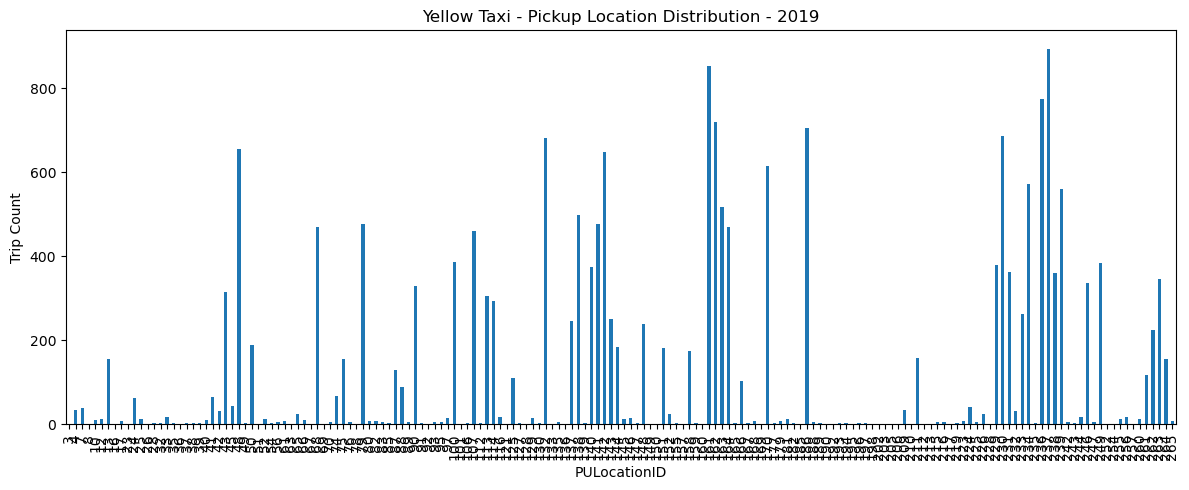

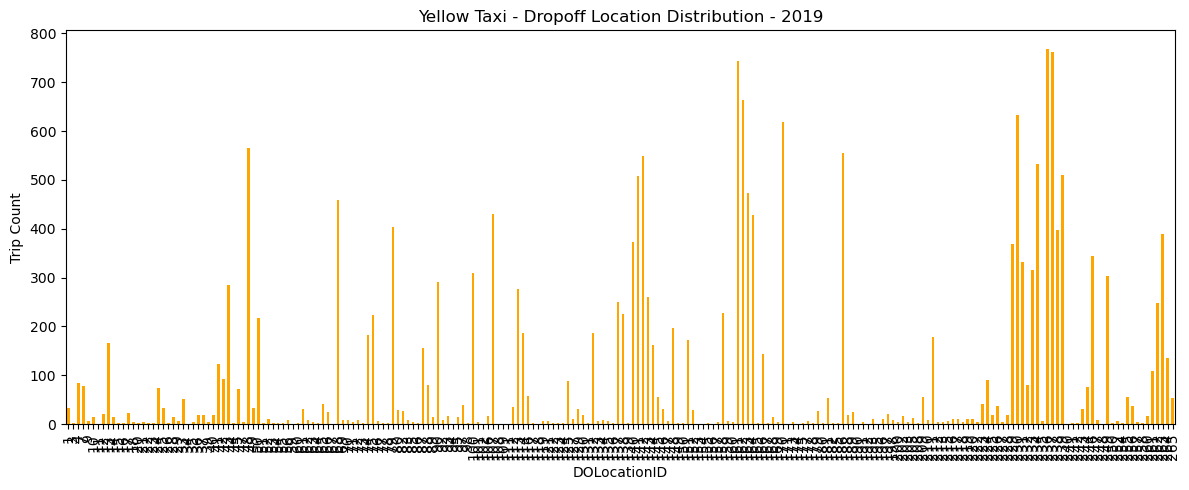

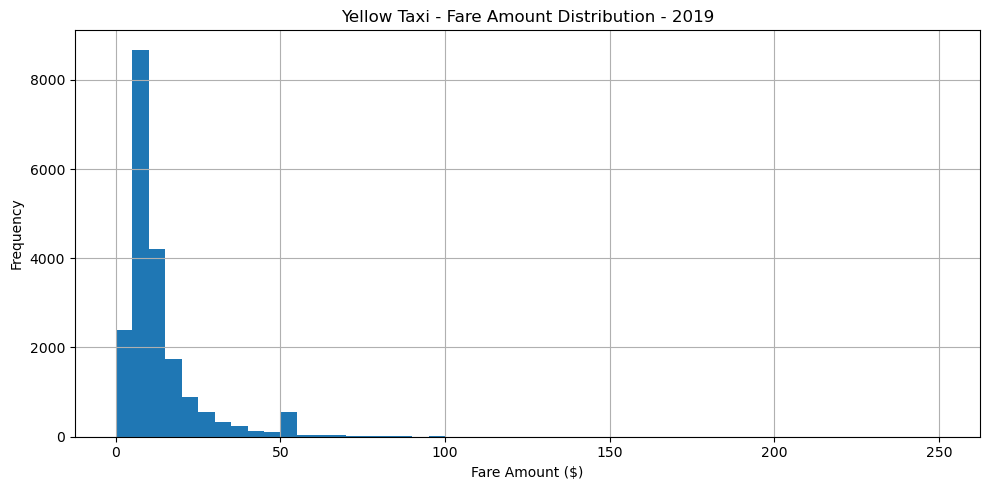

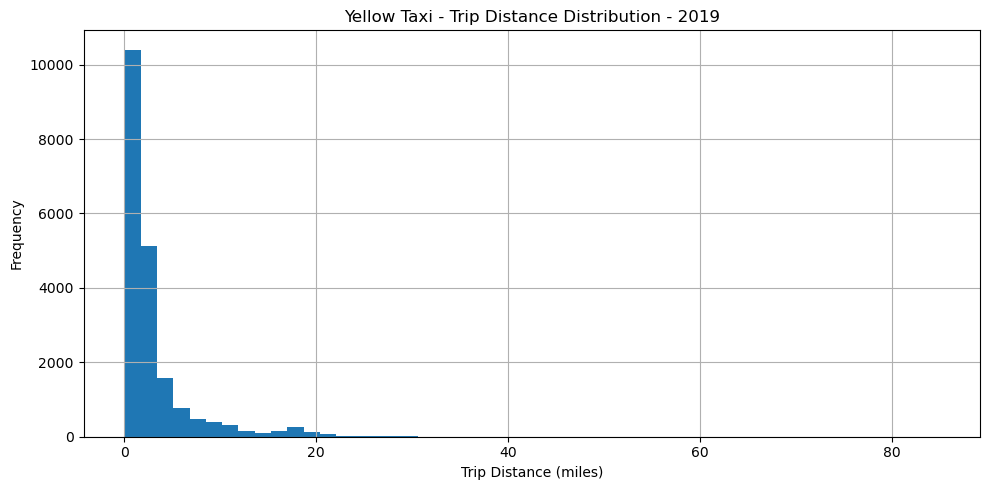


📊 Visualizing 2020...


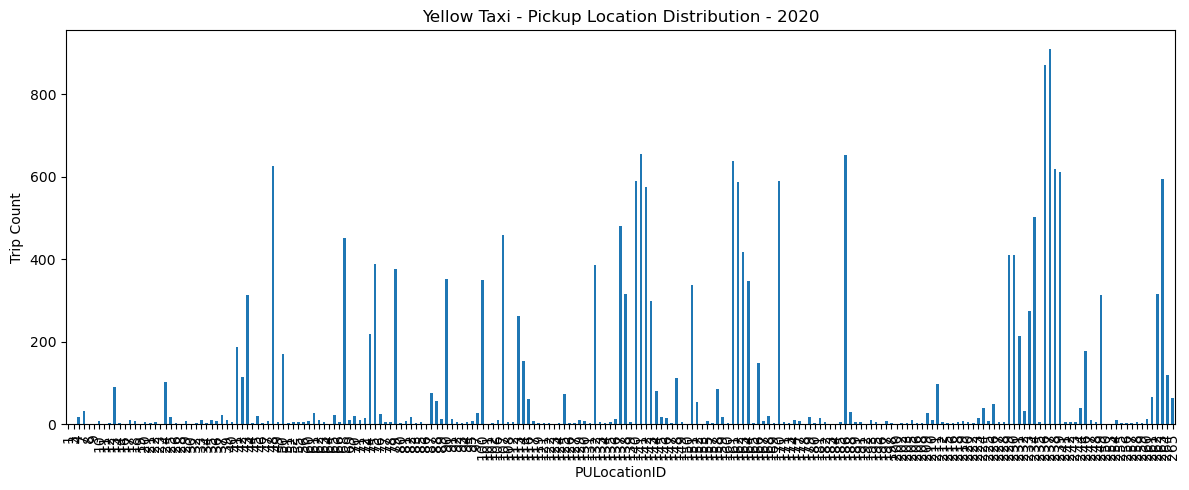

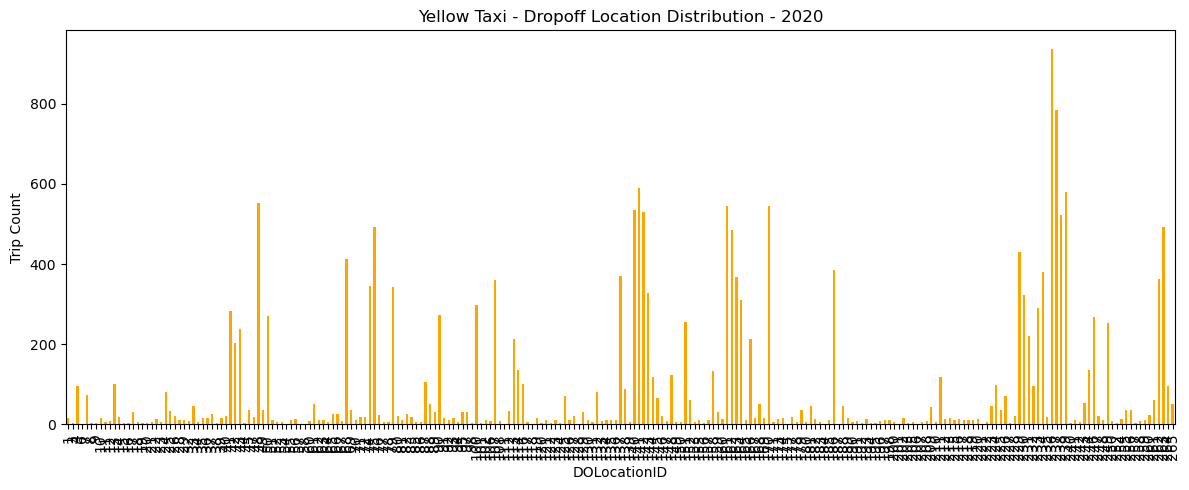

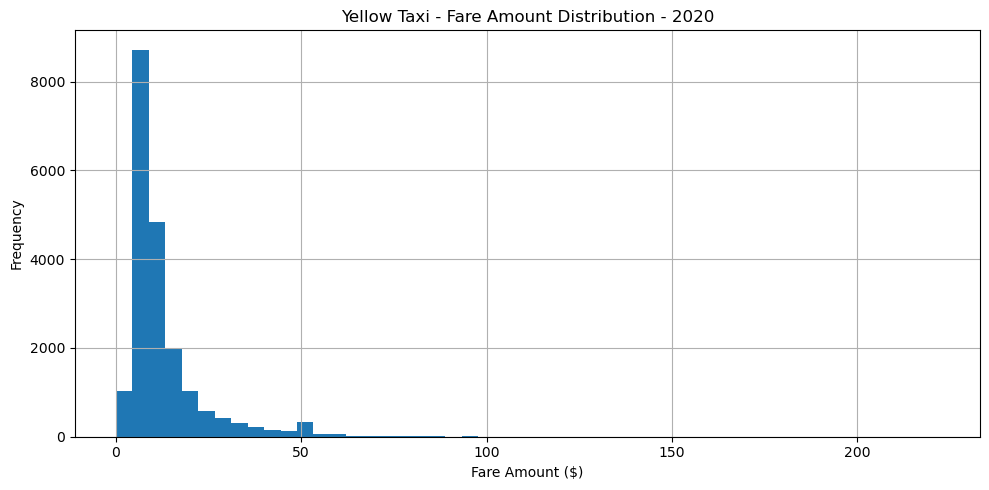

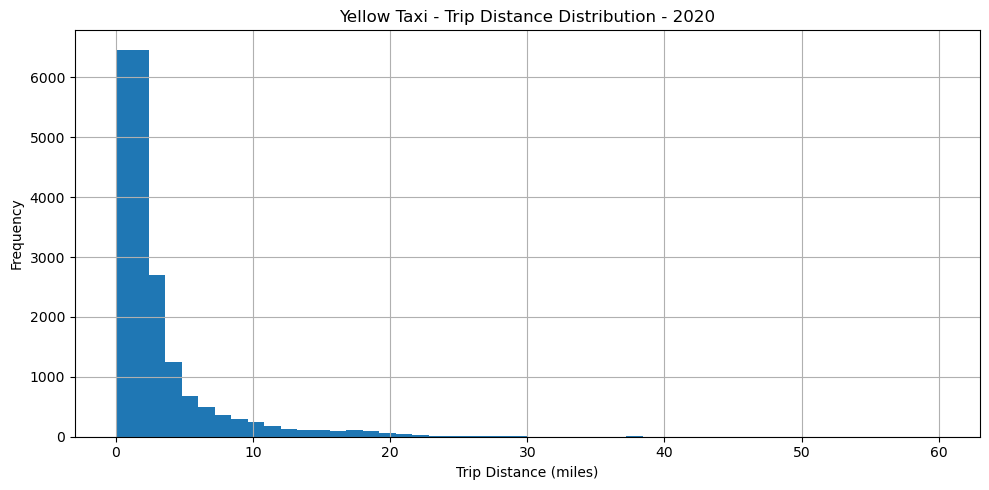


📊 Visualizing 2021...


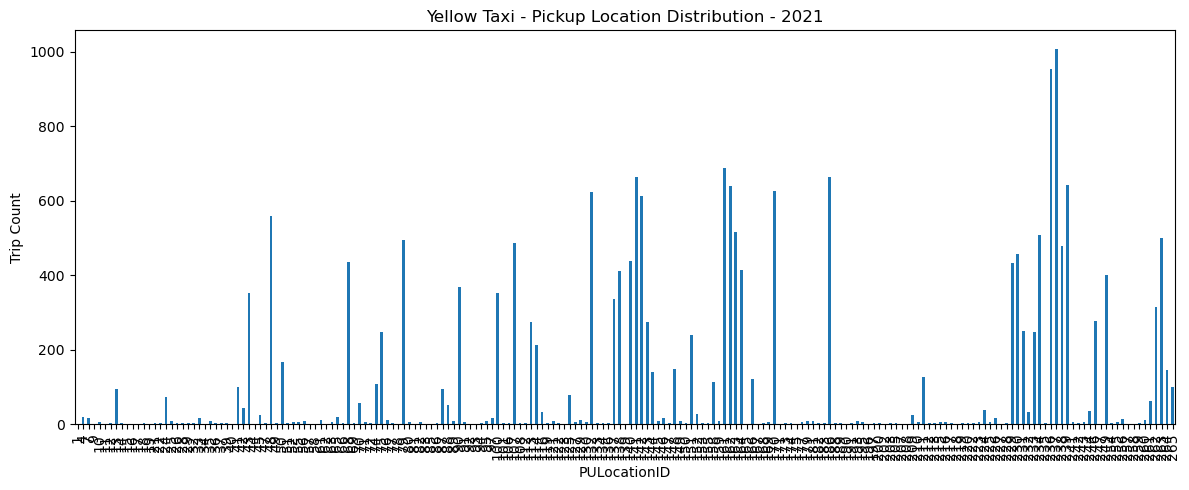

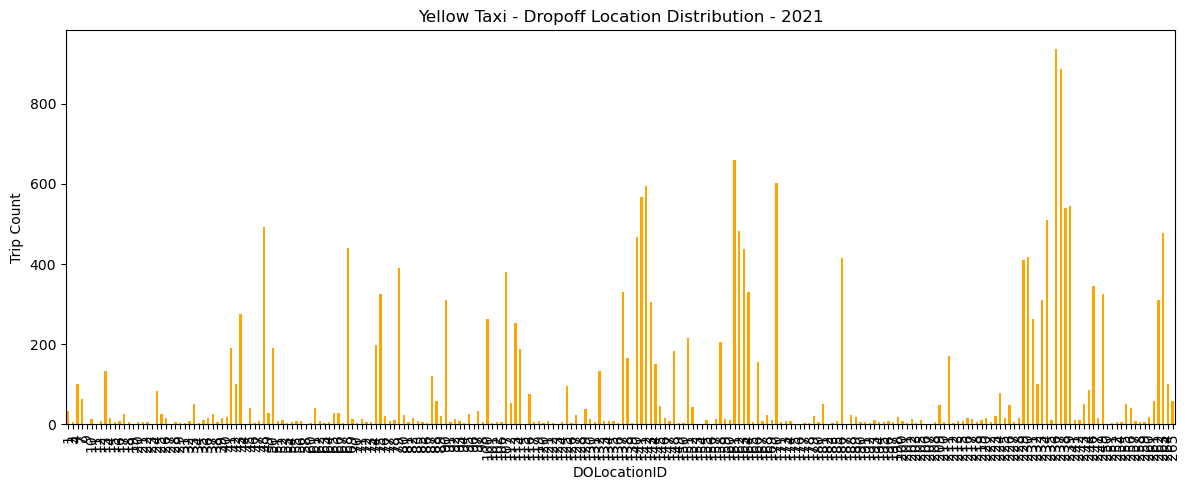

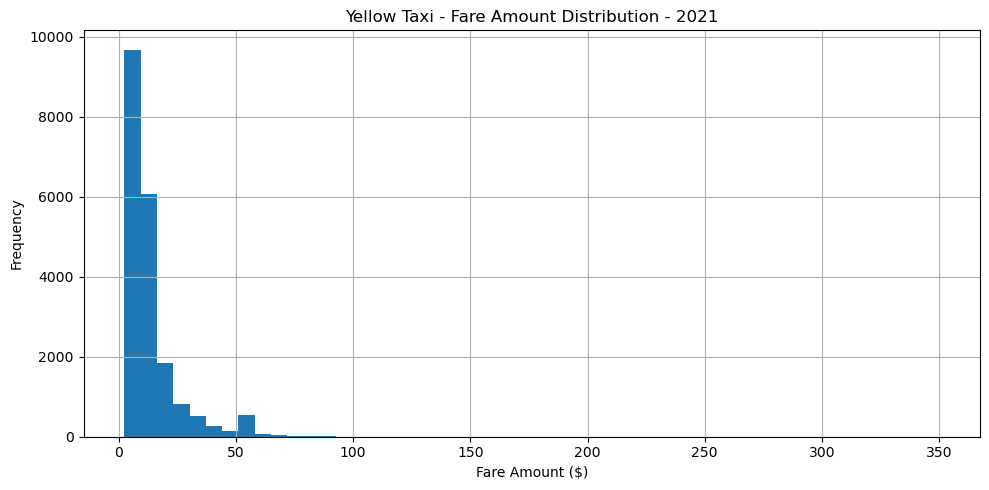

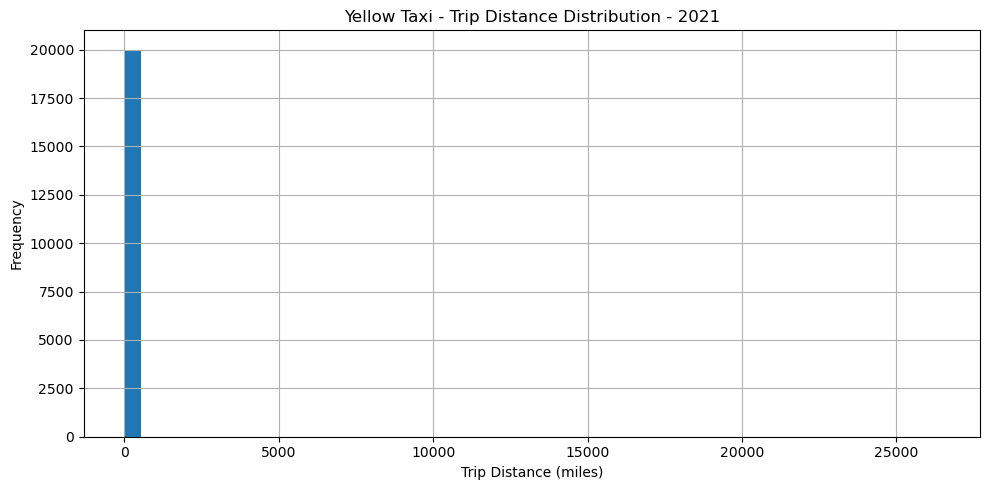


📊 Visualizing 2022...


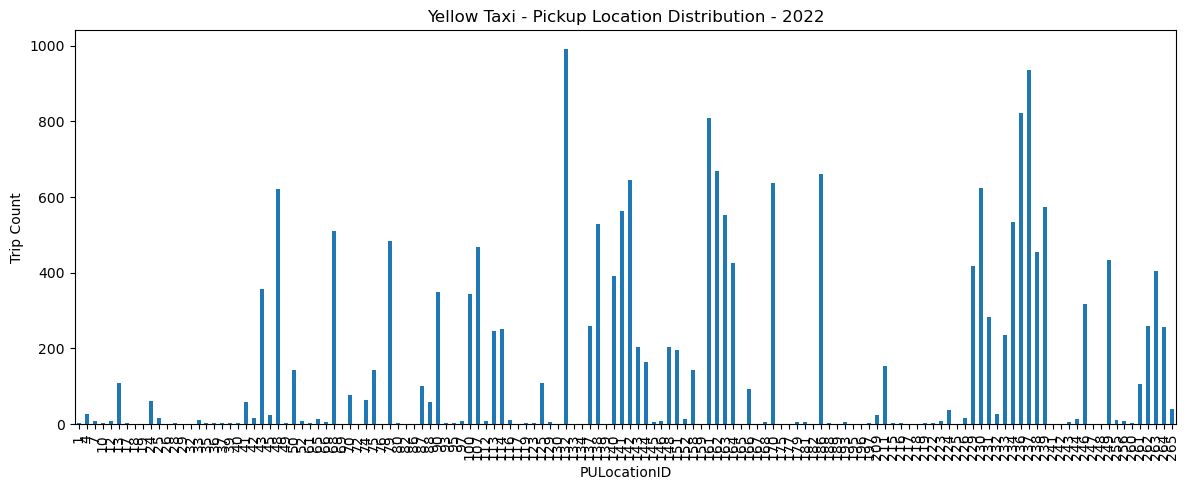

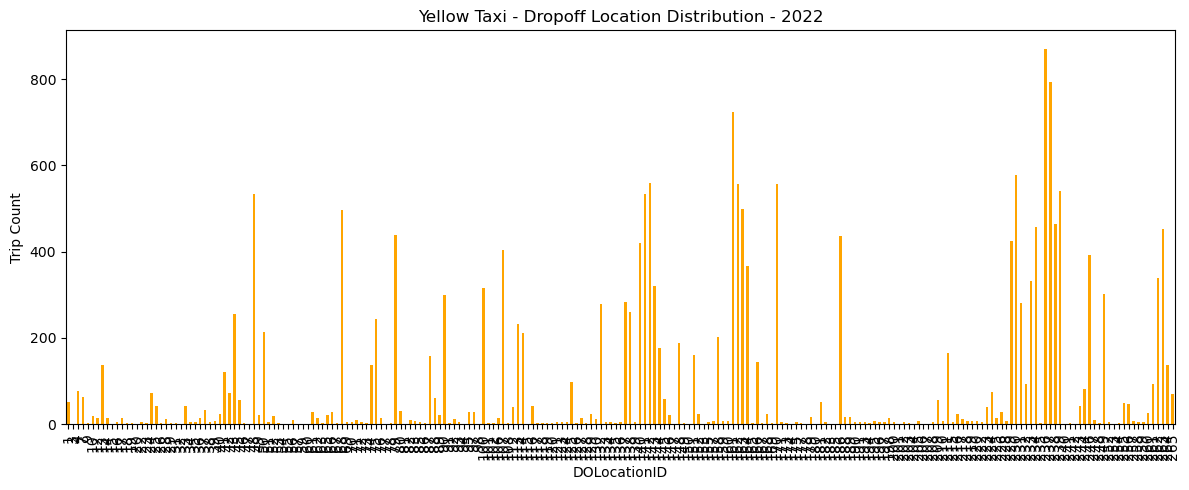

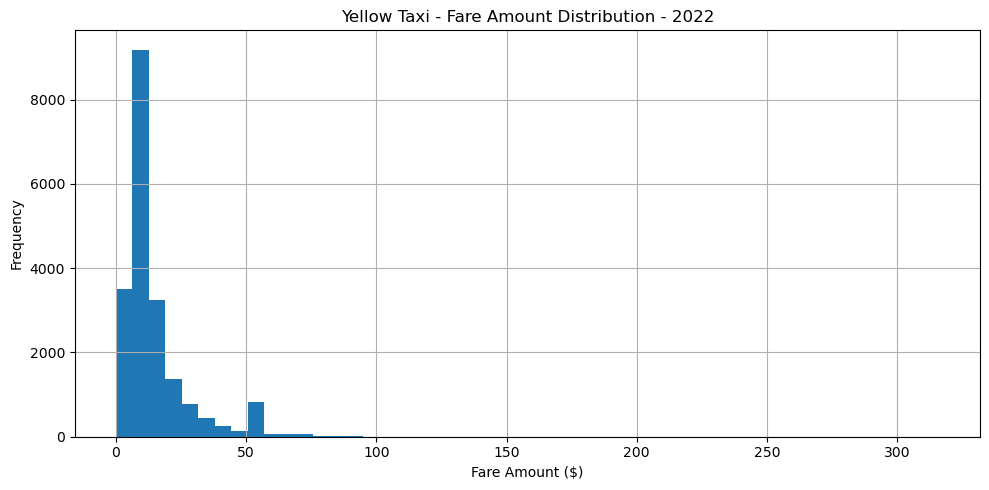

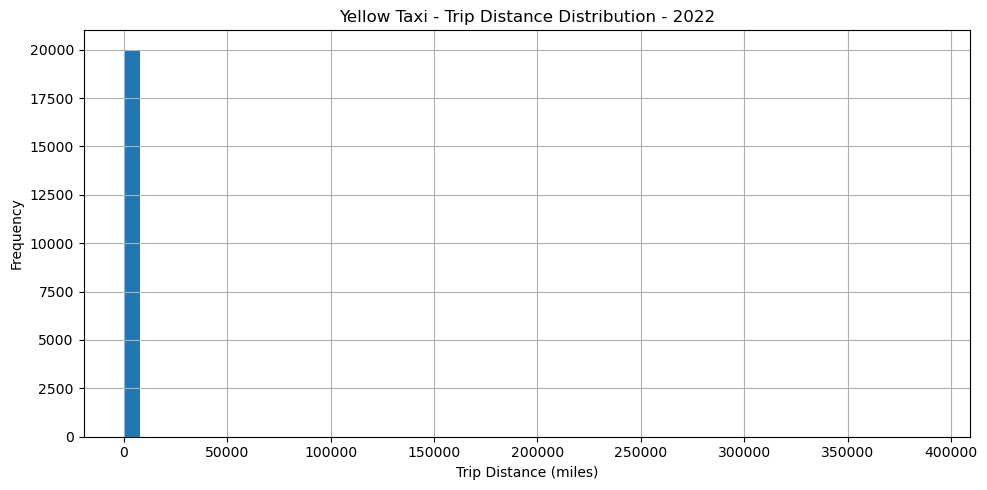


📊 Visualizing 2023...


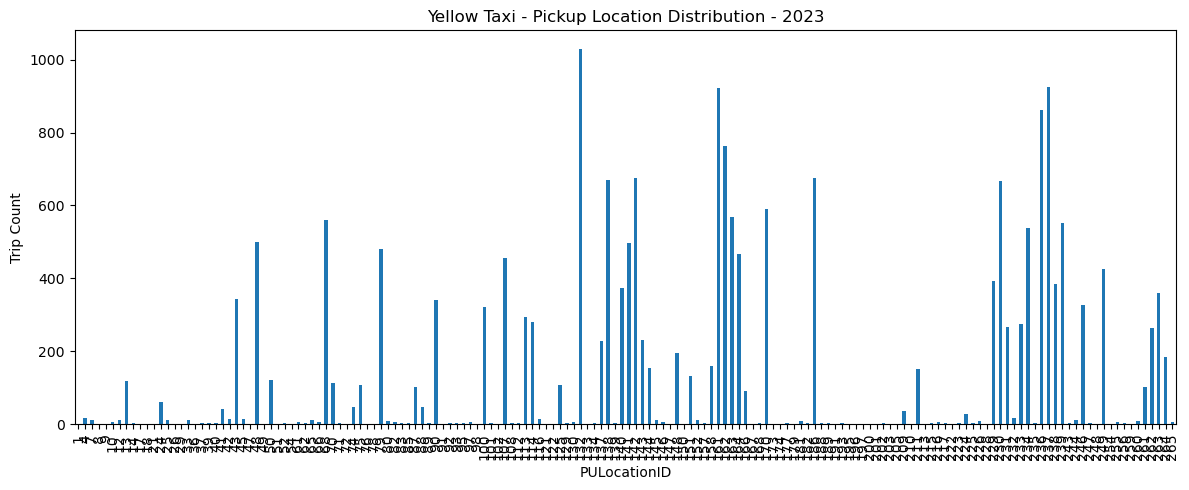

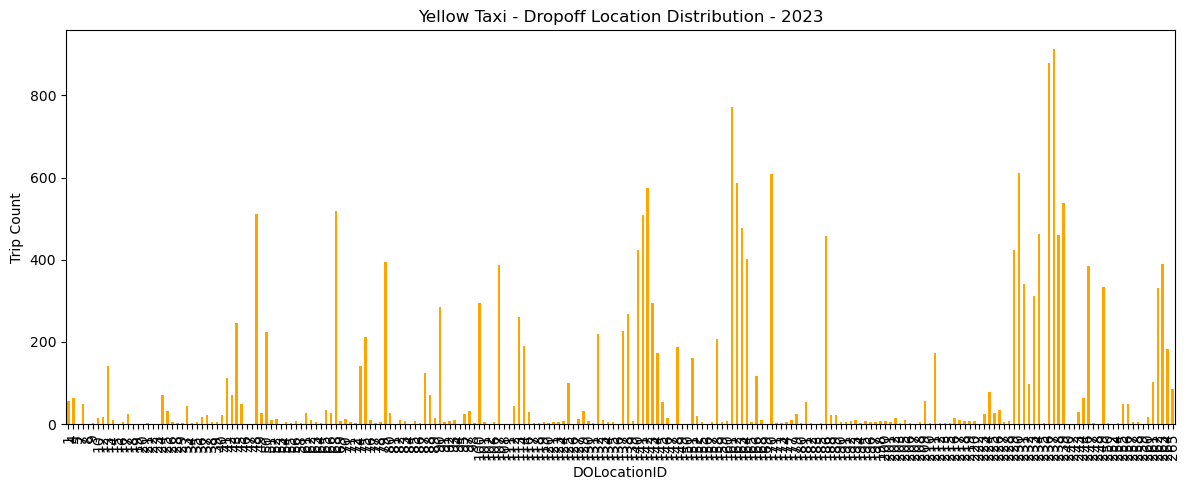

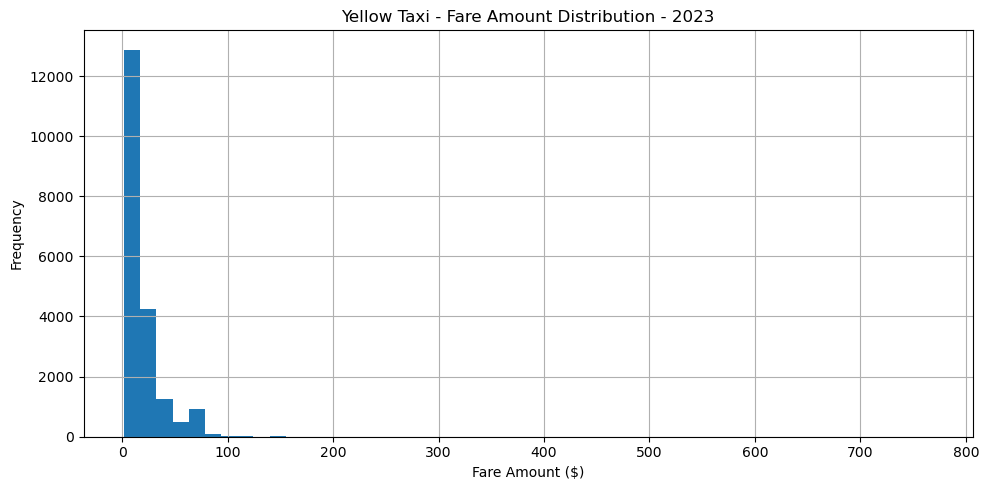

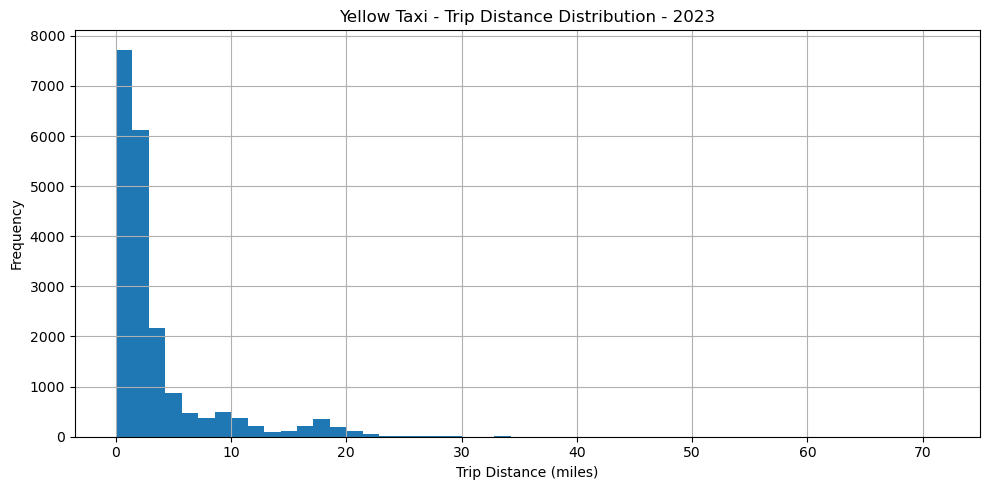


📊 Visualizing 2024...
❗ Error processing D:\MSDS\Network Science\project\yellowtrips_cleaned_per_year\yellow_tripdata_2024_cleaned.csv: [Errno 2] No such file or directory: 'D:\\MSDS\\Network Science\\project\\yellowtrips_cleaned_per_year\\yellow_tripdata_2024_cleaned.csv'


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIGURATION ===
folder = r"D:\MSDS\Network Science\project\yellowtrips_cleaned_per_year"
years = list(range(2015, 2025))  # 2015 to 2024

# Visualization loop
for year in years:
    print(f"\n📊 Visualizing {year}...")
    file_path = os.path.join(folder, f"yellow_tripdata_{year}_cleaned.csv")
    
    try:
        df = pd.read_csv(file_path)
        
        # 1️⃣ Pickup distribution
        plt.figure(figsize=(12, 5))
        df['PULocationID'].value_counts().sort_index().plot(kind='bar')
        plt.title(f'Yellow Taxi - Pickup Location Distribution - {year}')
        plt.xlabel('PULocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # 2️⃣ Dropoff distribution
        plt.figure(figsize=(12, 5))
        df['DOLocationID'].value_counts().sort_index().plot(kind='bar', color='orange')
        plt.title(f'Yellow Taxi - Dropoff Location Distribution - {year}')
        plt.xlabel('DOLocationID')
        plt.ylabel('Trip Count')
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # 3️⃣ Fare amount distribution
        plt.figure(figsize=(10, 5))
        df['fare_amount'].dropna().hist(bins=50)
        plt.title(f'Yellow Taxi - Fare Amount Distribution - {year}')
        plt.xlabel('Fare Amount ($)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        plt.close()

        # 🚗 (Optional) Trip distance distribution
        if 'trip_distance' in df.columns:
            plt.figure(figsize=(10, 5))
            df['trip_distance'].dropna().hist(bins=50)
            plt.title(f'Yellow Taxi - Trip Distance Distribution - {year}')
            plt.xlabel('Trip Distance (miles)')
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
            plt.close()
        
    except Exception as e:
        print(f"❗ Error processing {file_path}: {e}")


In [26]:
import pandas as pd
import os

# === CONFIG ===
input_folder = r"D:\MSDS\Network Science\project\fhv_combined_data_sampled"
output_folder = r"D:\MSDS\Network Science\project\fhv_cleaned_per_year"
os.makedirs(output_folder, exist_ok=True)

years = range(2018, 2025)
sample_size = 20000

for year in years:
    # Collect files for the year
    files = [
        f for f in os.listdir(input_folder)
        if f.startswith(f"fhv_tripdata_{year}") and f.endswith("_sampled.csv")
    ]
    
    combined_df = pd.DataFrame()
    
    for file in files:
        file_path = os.path.join(input_folder, file)
        print(f"Reading: {file_path}")
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    if not combined_df.empty:
        # Drop duplicates to reduce bias (same trip appearing multiple times)
        combined_df = combined_df.drop_duplicates()

        # Sample ~20k rows if available
        sampled_df = combined_df.sample(n=min(sample_size, len(combined_df)), random_state=42)
        
        # Save per year
        out_file = os.path.join(output_folder, f"fhv_tripdata_{year}_cleaned_sampled.csv")
        sampled_df.to_csv(out_file, index=False)
        print(f"✅ Saved cleaned year file: {out_file}")
    else:
        print(f"⚠️ No files found for {year}")


Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2018-01_to_2018-04_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2018-05_to_2018-08_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2018-09_to_2018-12_sampled.csv
✅ Saved cleaned year file: D:\MSDS\Network Science\project\fhv_cleaned_per_year\fhv_tripdata_2018_cleaned_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2019-01_to_2019-04_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2019-05_to_2019-08_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2019-09_to_2019-12_sampled.csv
✅ Saved cleaned year file: D:\MSDS\Network Science\project\fhv_cleaned_per_year\fhv_tripdata_2019_cleaned_sampled.csv
Reading: D:\MSDS\Network Science\project\fhv_combined_data_sampled\fhv_tripdata_2020-01_to_2020-04